# 120年のオリンピックをPandasで振り返る

120olympic_prepare　の続きです。分析編。
<br>
<br>




![Olympic logos](./logos.png)


<br>
<br>



# 5 データ分析：いくつかの準備


<準備編>
- CSVファイルの読み込み
- Pandas Dataframeの作成
- 欠損値処理
- データフレームの結合



## 5-1 必要なパッケージのインポート

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np



# Matplotlib for Japanese and Jupyter notebook inline 
font = {"family":"Noto Sans CJK JP"}
matplotlib.rc('font', **font)
%matplotlib inline
sns.set(font=["Noto Sans CJK JP"])

In [3]:
# ピックルファイル読み込み
df = pd.read_pickle('./data/processed/df.pkl')



## 5-2 夏季オリンピックに限定したデータセット作成

今回は夏季オリンピックのデータに限定します。

In [4]:
# メダルのダミー変数
tmp = pd.get_dummies(df['Medal'])

# メダルのダミー変数を結合
df = pd.concat([df,tmp],axis=1)

#メダル総数カラム追加
df['MedalSum'] = df['Silver'] + df['Bronze'] + df['Gold']

# 夏季オリンピックのデータフレーム作成
sub_df_tmp  = df.query('Season == "Summer"')
sub_df = sub_df_tmp.copy()

# 6 データ分析

目次:

- 6-1 オリンピック全体の歴史
    - 6-1-1 参加国の推移

- 6-2 オリンピック参加国の分析
    - 6-2-1 やっぱりアメリカ？メダル量産国はどこですか？
    - 6-2-2 主要国（G7+中国）のメダル獲得状況は？日本は結構上位なんですか？
    - 6-2-3 参加してるけど、まだメダル取ったことない国ってありますか？
    - 6-2-4 やっぱりホスト国は、モチベーション高いですよね？勝率高いですか？

- 6-3 オリンピック選手たちの分析
    - 6-3-1 選手たちの寿命は？２０歳前後が活躍してそうですけど、どうですか？
    - 6-3-2 中年男性や中年女性でも獲得できるメダルはありますか？
    - 6-3-3 マイケル・フェルプスだっけ？たくさんメダル獲得している人いますよね？
    - 6-3-4 何度も何度もオリンピックに出てる人たちっていますよね？
    - 6-3-5 何歳から参加できるんですか？逆に、何歳まで可能性あるんですか？

-  6-4 オリンピック競技の分析
    - 6-4-1 最近、野球なくなりましたよね？競技って増えてるんですか？減ってるんですか？
    - 6-4-2 参加国が少ない、狙い目の競技ってありますか？
    - 6-4-3 日本が参加してない競技ってあるんですか？
    - 6-4-4 全ての国が参加してる大人気競技ってあるんですか？
    - 6-4-5 例えば柔道って、重ければ勝てるんですか？体重と身長が関係しそうな競技ってどれですか？

- 6-5 日本のオリンピックの歴史
    - 6-5-1 日本っていつから参加してるんですか？
    - 6-5-2 選手団って聞くけど、毎回何人くらいいるんですか？
    - 6-5-3 柔道が強い？毎回メダル取ってる種目ってなんですか？
    - 6-5-4 何度出てもメダルが取れない競技ってなんですか？

---

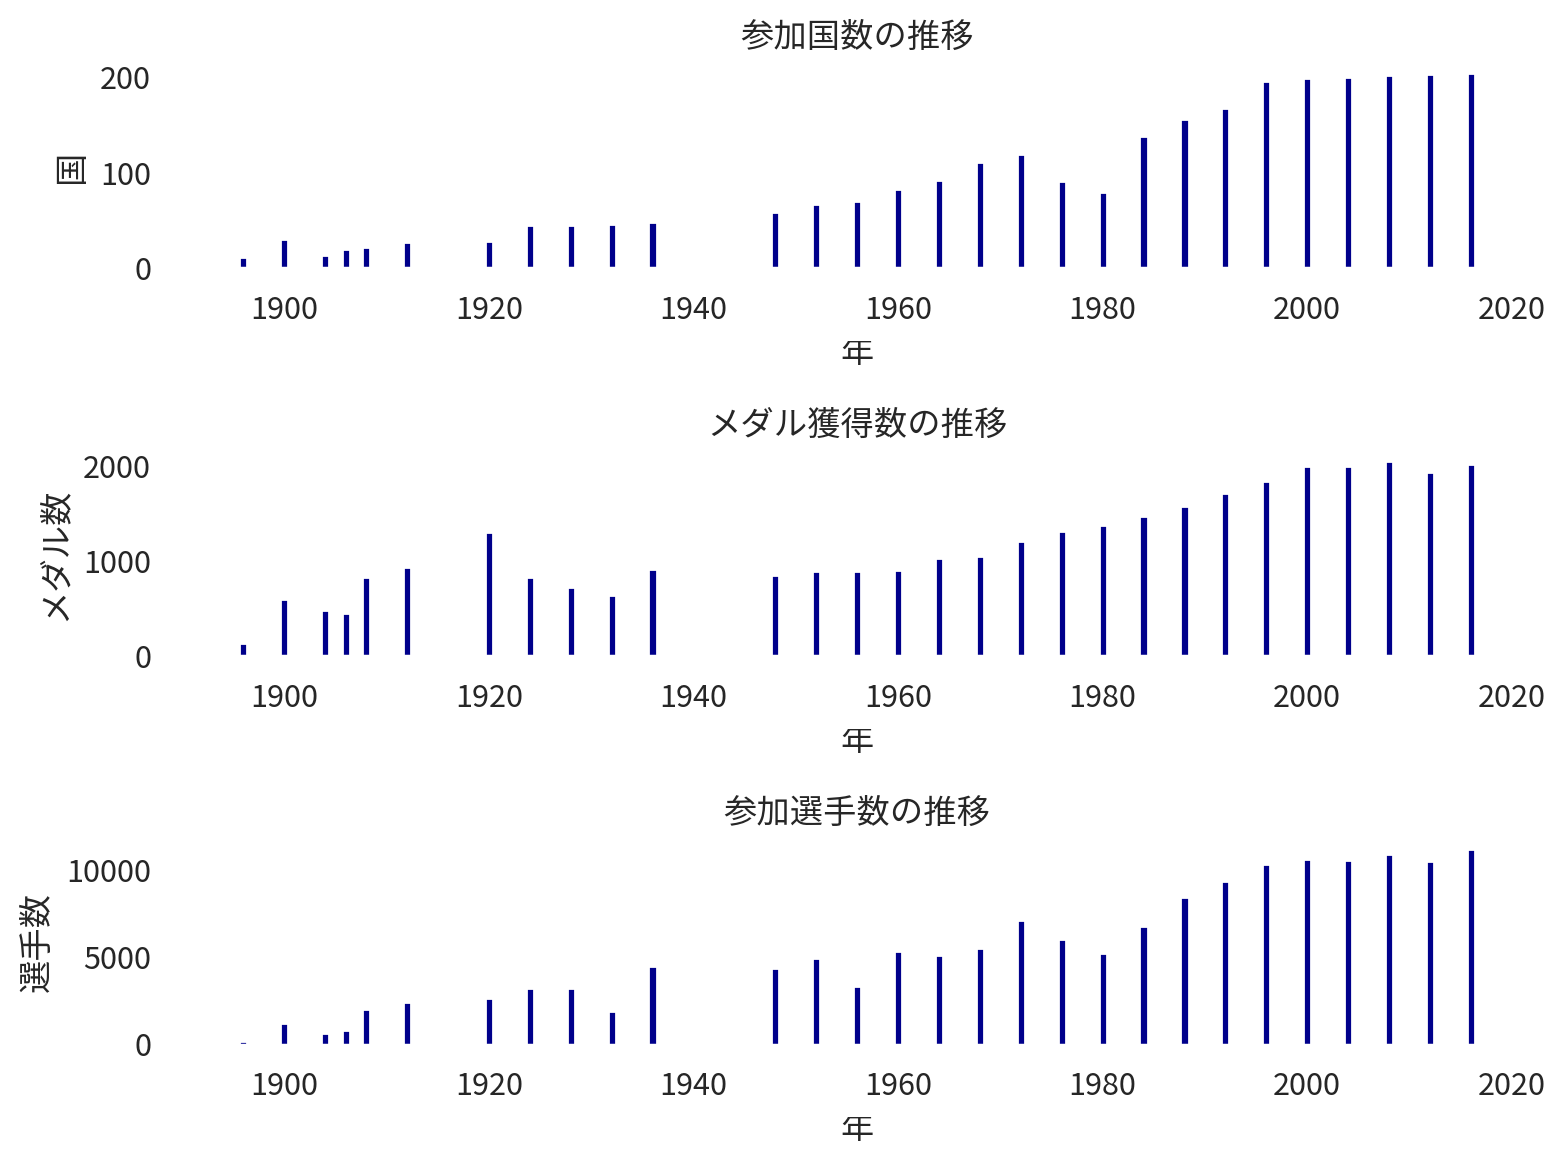

In [5]:

###### 参加国の推移 ######


# 1. データの準備
## ax1 = 参加国
x = sub_df.groupby('Year').nunique().index
y = sub_df.groupby('Year').nunique()['region']

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(8,6),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(3,1,1)

# 4. データを渡してプロット 
ax.bar(x,y,color='darkblue',align='center') #棒グラフ
#ax.plot(x,y) 線グラフ ,   ax.barh(x,)横持ち帽グラフ


# 5. グラフタイトルと軸の調整
ax.set_title('参加国数の推移')
ax.set_xlabel('年')
ax.set_ylabel('国')
ax.set_facecolor((1,1,1,0))


###### メダル獲得数の推移 ######


# 1. データの準備
## ax = 2 発行されたメダル数
x2 = sub_df.groupby('Year').nunique().index
y2 = sub_df.groupby('Year').sum()['MedalSum']

# 2. Figureインスタンス生成 
## 共通のため不要


# 3. Axes　インスタンス生成
ax2 = fig.add_subplot(3,1,2)


# 4. データを渡してプロット 
ax2.bar(x2,y2,color='darkblue',align='center') #棒グラフ


# 5. グラフタイトルと軸の調整
ax2.set_title('メダル獲得数の推移')
ax2.set_xlabel('年')
ax2.set_ylabel('メダル数')
ax2.set_facecolor((1,1,1,0))


###### 参加選手数の推移 ######


# 1. データの準備
## ax = 3 参加した選手の数
x3 = sub_df.groupby('Year').nunique().index
y3 = sub_df.groupby('Year').nunique()['ID']


# 2. Figureインスタンス生成 
## 共通のため不要


# 3. Axes　インスタンス生成
ax3 = fig.add_subplot(3,1,3)


# 4. データを渡してプロット 
ax3.bar(x3,y3,color='darkblue',align='center') #棒グラフ


# 5. グラフタイトルと軸の調整
ax3.set_title('参加選手数の推移')
ax3.set_xlabel('年')
ax3.set_ylabel('選手数')
ax3.set_facecolor((1,1,1,0))


###### 共通項目 ######

##四方の枠(spines)を消す 
sides = ['left','right','top'] 
[ax.spines[side].set_visible(False) for side in sides] 
[ax2.spines[side].set_visible(False) for side in sides] 
[ax3.spines[side].set_visible(False) for side in sides] 

fig.tight_layout()
plt.show()

In [6]:

# 1. データ準備
x = sub_df[sub_df['Sex']=='M']['ID'].nunique()
y = sub_df[sub_df['Sex']=='F']['ID'].nunique()

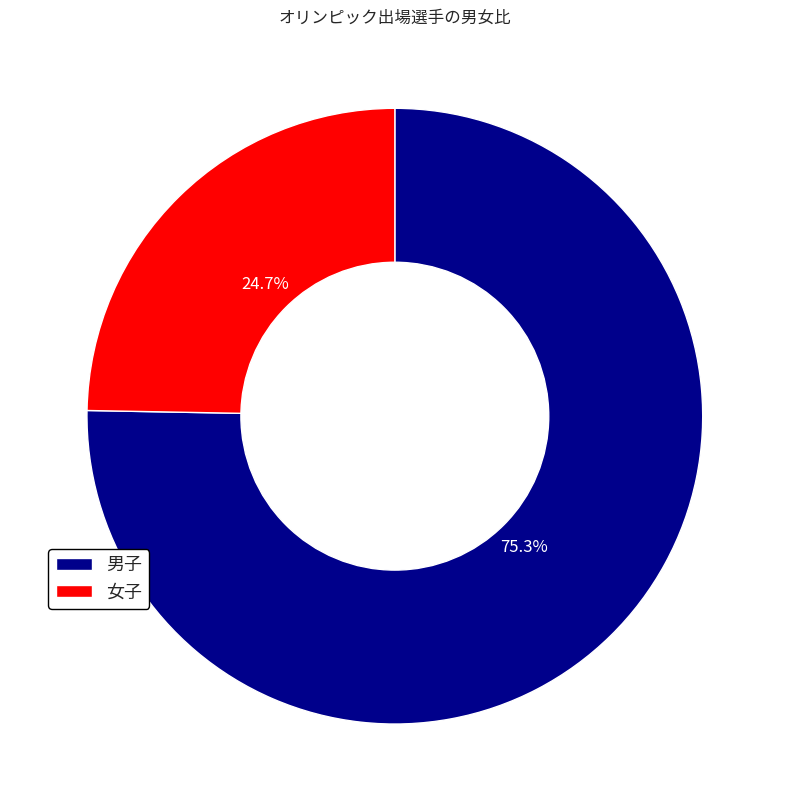

In [7]:



# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white", linewidth=2) #A4 size

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.pie([x,y],startangle=90,colors=['darkblue','red'],counterclock=False,autopct='%1.1f%%',textprops={'color':"w"}) 

# 5. グラフタイトルと軸の調整
ax.set_title('オリンピック出場選手の男女比')
ax.legend(['男子','女子'],loc=(0.05,0.25),facecolor='w',edgecolor='black',framealpha=1,frameon=True,fontsize=13)


# 6. キレイ化

circle=plt.Circle((0,0),radius=0.5,color='white')
ax.add_artist(circle)




fig.tight_layout()
plt.show()



## 6-2 オリンピック参加国の分析



### 6-2-1 やっぱりアメリカ？メダル量産国はどこですか？



In [8]:
region_medal = sub_df.groupby('region').sum()['MedalSum'].sort_values(ascending=False).reset_index()
region_medal.sort_values('MedalSum',inplace=True)


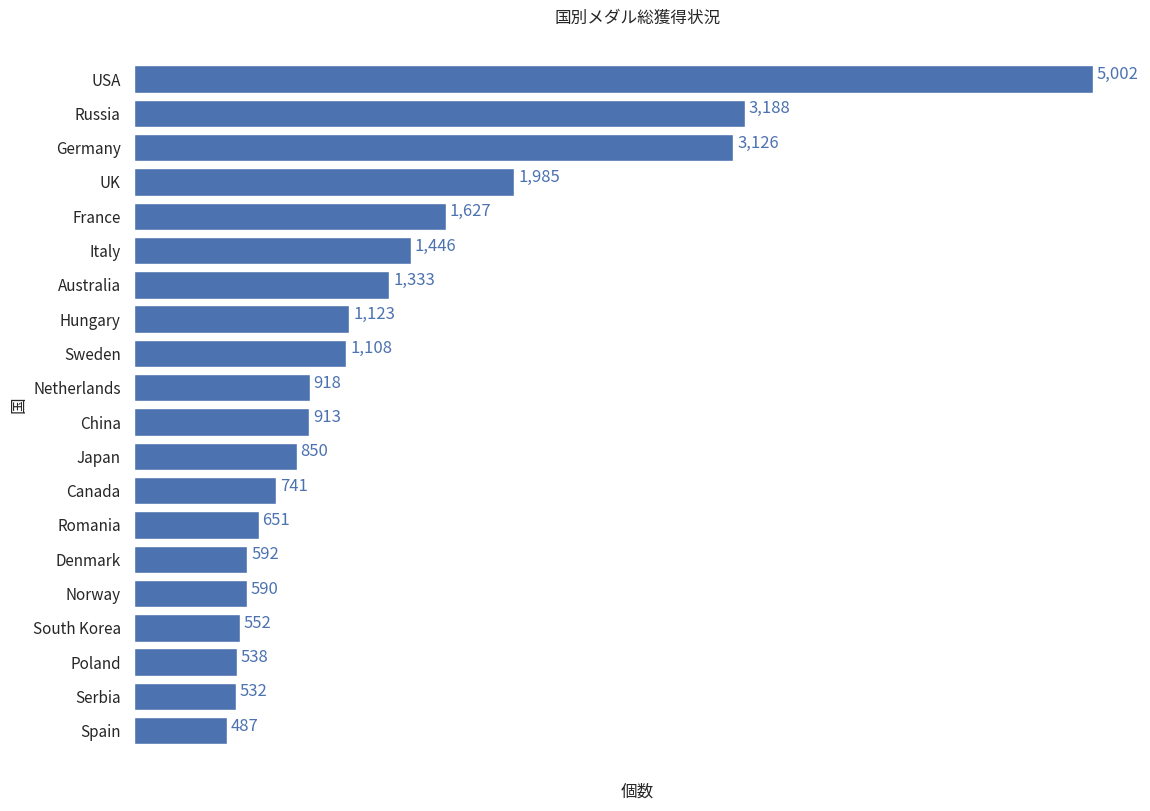

In [9]:


# 1. データ準備
x = region_medal.region.tail(20)
y = region_medal.MedalSum.tail(20)

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.barh(x,y,color='C0') #棒グラフ
#ax.plot(x,y) 線グラフ ,   ax.barh(x,)横持ち帽グラフ


# 5. グラフタイトルと軸の調整

## y軸 x軸の枠を消す場合
ax.tick_params(bottom=False,left=False,labelbottom=False) 

##四方の枠(spines)を消す 1
sides = ['left','right','top','bottom'] 
[ax.spines[side].set_visible(False) for side in sides] 

ax.set_title('国別メダル総獲得状況')
ax.set_xlabel('個数')
ax.set_ylabel('国')
ax.set_facecolor((1,1,1,0))

## データラベルを表示
for i, value in enumerate(region_medal.tail(20)['MedalSum']):
    ax.text(value+20,i,f'{value:,.0f}',color='C0')
    
    
fig.tight_layout()
plt.show()

In [10]:
print('-'*50)
s = sub_df['MedalSum'].sum()
s1 = sub_df.query('NOC == "USA"')['MedalSum'].sum()
s2 = region_medal.MedalSum.tail(20).sum()
print('120年間のメダル総数:',f'{s:,}')
print('アメリカのメダル総数:',f'{s1:,}:','メダル占有率:',f'{s1/s:.2%}')
print('メダル獲得上位20カ国ののメダル総数:',f'{s2:,.0f}:','メダル占有率:',f'{s2/s:.2%}')
print('-'*50)




--------------------------------------------------
120年間のメダル総数: 34,088
アメリカのメダル総数: 5,002: メダル占有率: 14.67%
メダル獲得上位20カ国ののメダル総数: 27,302: メダル占有率: 80.09%
--------------------------------------------------


In [11]:
serbia_df = sub_df.query('region == "Serbia"')
serbia_df.groupby('Sport').sum().sort_values('MedalSum',ascending=False)[['Bronze','Silver','Gold','MedalSum']].head(5)

,Bronze,Silver,Gold,MedalSum
Sport,,,,
Water Polo,39.0,51.0,50.0,140.0
Basketball,36.0,72.0,12.0,120.0
Football,17.0,40.0,16.0,73.0
Handball,15.0,14.0,43.0,72.0
Volleyball,12.0,12.0,11.0,35.0


### INSIGHT

- 120年間で人類が獲得したメダル総数は3.4万個。そのうち**アメリカだけで15%程度**を占めています。また、参加約200カ国のうち上位10%にあたる20カ国でメダル総数の80%以上を獲得しています。
- 上位20カ国のうち、南半球の国はオーストラリアだけです。
- ノーマークだったのはセルビア。少し追加調査。Water Polo（水球）やバスケット、フットボール、ハンドボールなどに強い模様。チーム戦に強い？てか、チーム戦の場合はメダル数が多いのか！

---

### 6-2-2 主要国（G7+中国）のメダル獲得状況は？日本は結構上位なんですか？

G7: Group of Seven の略で、フランス、アメリカ、イギリス、ドイツ、日本、イタリア、カナダの7つの先進国  

In [12]:
g7 = ['USA','France','UK','Germany','Japan','Italy','Canada','China']
g7_sum = sub_df.query('region == @g7').sum()['MedalSum']
print('G7+中国のメダル総数:',f'{g7_sum:,}')



G7+中国のメダル総数: 15,690


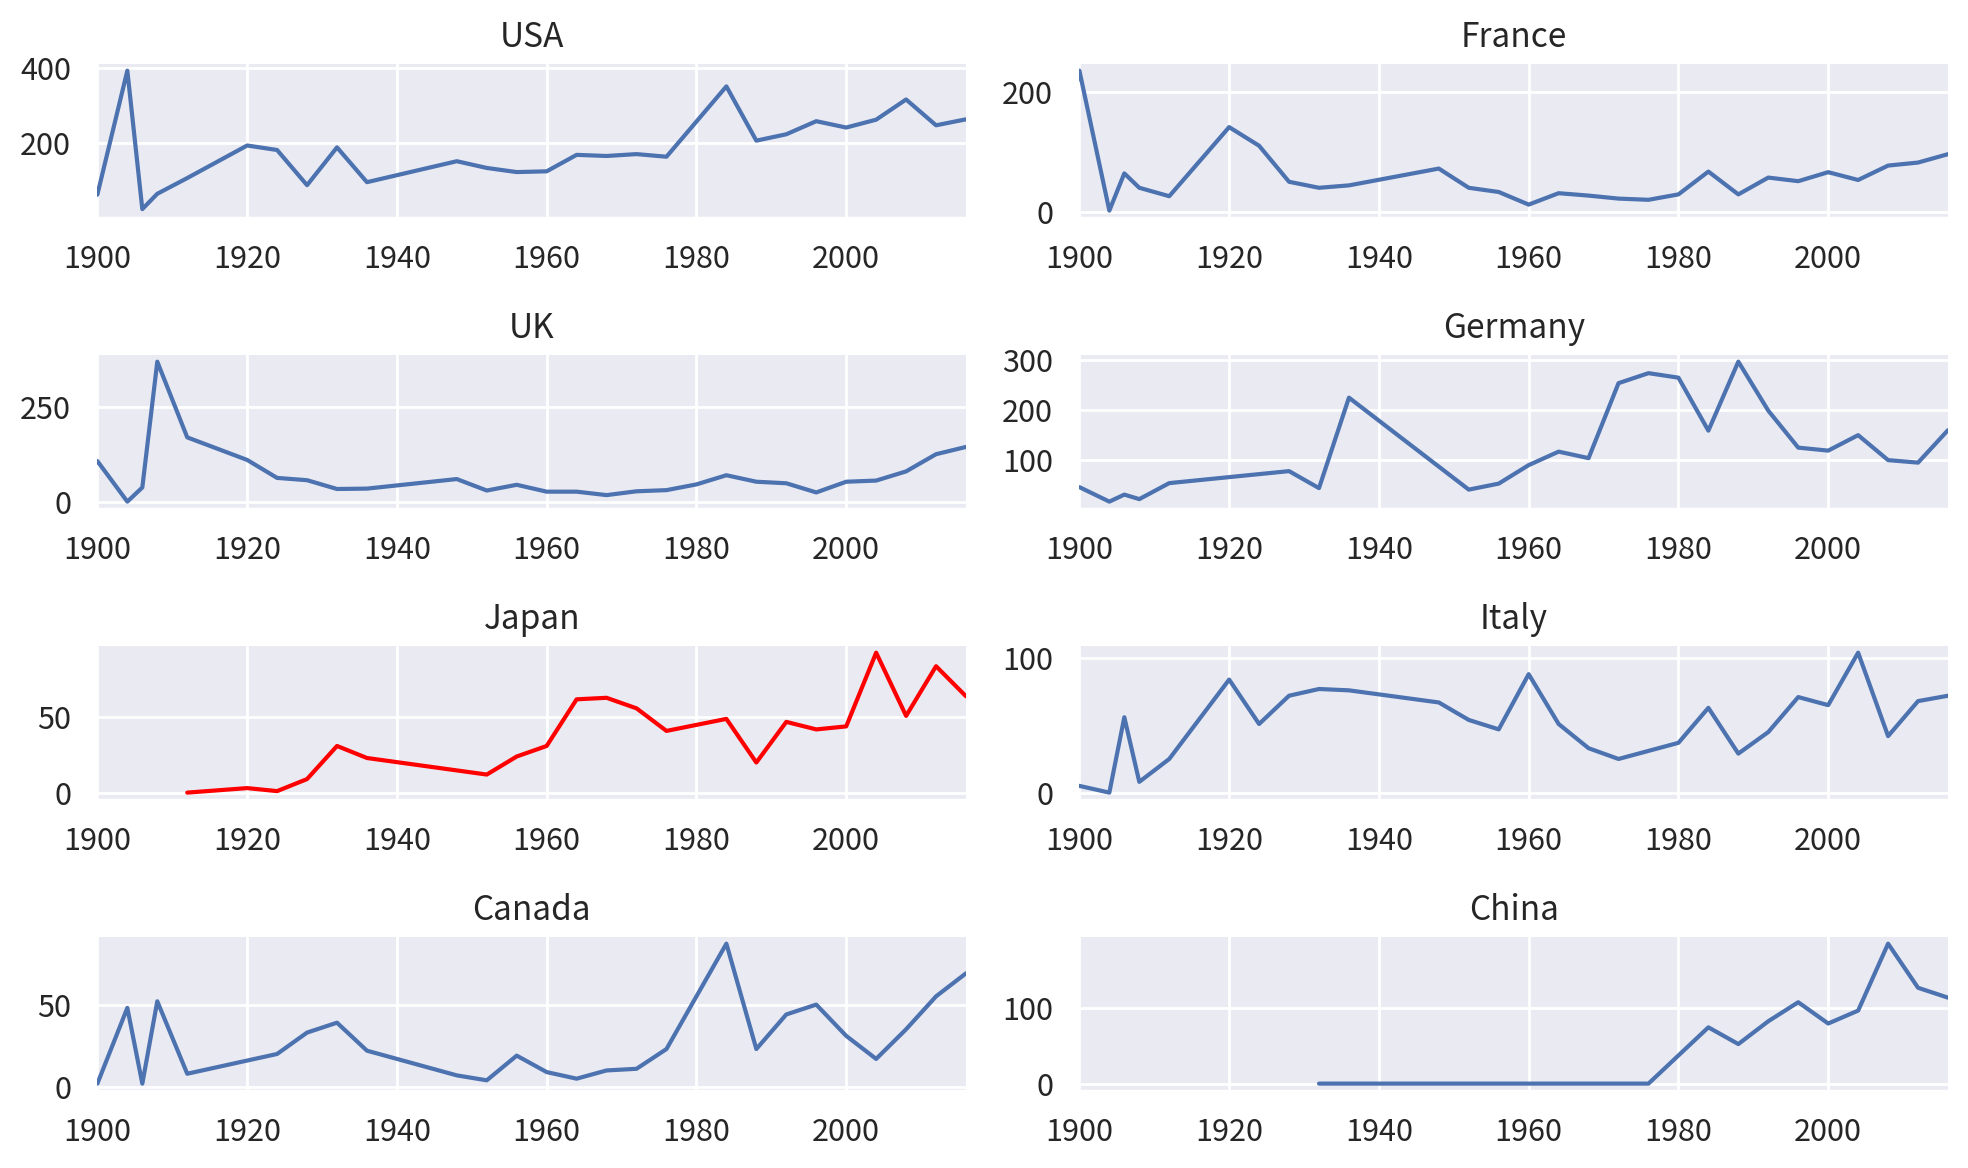

In [13]:
g7_df = sub_df.groupby(['region','Year']).sum()




fig = plt.figure(figsize=(10,6),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 
ax=[]
sides = ['left','right','top'] 


for i,region in enumerate(g7):
    ax.append(fig.add_subplot(4,2,i+1))
    if region == 'Japan':
        ax[i].plot(g7_df.query('region == @region').reset_index()\
              ['Year'],g7_df.query('region == @region')["MedalSum"],color='red')
        ax[i].set_xlim(1900,2016)
        [ax[i].spines[side].set_visible(False) for side in sides] 
        ax[i].set_title(region)
    else:
        ax[i].plot(g7_df.query('region == @region').reset_index()\
              ['Year'],g7_df.query('region == @region')["MedalSum"])
        ax[i].set_xlim(1900,2016)
        [ax[i].spines[side].set_visible(False) for side in sides] 
        ax[i].set_title(region)





fig.tight_layout()
plt.show()


### INSIGHT
- G7＋中国の8カ国はメダル獲得上位20カ国に含まれています。オリンピックは先進国が活躍しやすい祭典ですね。
- G7＋中国の8カ国の中では、日本は7位です。頑張れー。
- 中国は1970年あたりから急激に活躍し始めました

--- 


### 6-2-3 参加してるけど、まだメダル取ったことない国ってありますか？



In [14]:
nomedal_df = sub_df.groupby('region').sum()

print('メダル未獲得国リスト:\n',nomedal_df.query('MedalSum == 0').index)
print('-'*50)
print('メダル未獲得国数：',nomedal_df.query('MedalSum == 0').index.nunique())
print('-'*50)



メダル未獲得国リスト:
 Index(['Albania', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Aruba',
       'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Boliva',
       'Bosnia and Herzegovina', 'Brunei', 'Burkina Faso', 'Cambodia',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Comoros', 'Cook Islands', 'Democratic Republic of the Congo',
       'Dominica', 'El Salvador', 'Equatorial Guinea', 'Gambia', 'Guam',
       'Guinea', 'Guinea-Bissau', 'Honduras', 'Kiribati', 'Laos', 'Lesotho',
       'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Maldives',
       'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Micronesia',
       'Myanmar', 'Nauru', 'Nepal', 'Nicaragua', 'Oman', 'Palau', 'Palestine',
       'Papua New Guinea', 'Republic of Congo', 'Rwanda', 'Saint Kitts',
       'Saint Lucia', 'Saint Vincent', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Sierra Leone',
       'Solomon Islands', 'Somalia', 'South Sudan', 'Swa

### INSIGHT
- メダル未獲得の国数は71カ国と、全参加国（region）206カ国の34%を占める。2020東京で初メダル獲得が叶うといいですね。
---

### 6-2-4 やっぱりホスト国は、モチベーション高いですよね？勝率高いですか？

#### 6-2-4-1 データ前処理：
結果データには都市名しかありませんが、都市名と国をマッピングしたCSVを発見しました。利用させていただきます。  
[Olympic Host Cities](https://www.kaggle.com/jonscheaffer/olympic-host-cities)

■注意点:結果データ（df）とOlympic Host Citiesを結合させるときの注意点
- 一見すると同じように見える単語でもROMAとROMEで若干違ったので、`merge`時はキーチェック
- 単純に都市名だけで`merge`すると複数年開催された都市（London）の場合、複数マージされてしまい合計行数が増えてしまった。キーは都市名と年度を合わせてキーとする必要がありました。


#### どのようにホスト国を分析したらいいのでしょうか？

- ホスト国は参加選手数が多いなら、メダル絶対数も多い？（開催国優遇がある？）
- 開催年と前後開催年の獲得メダル数を比較？


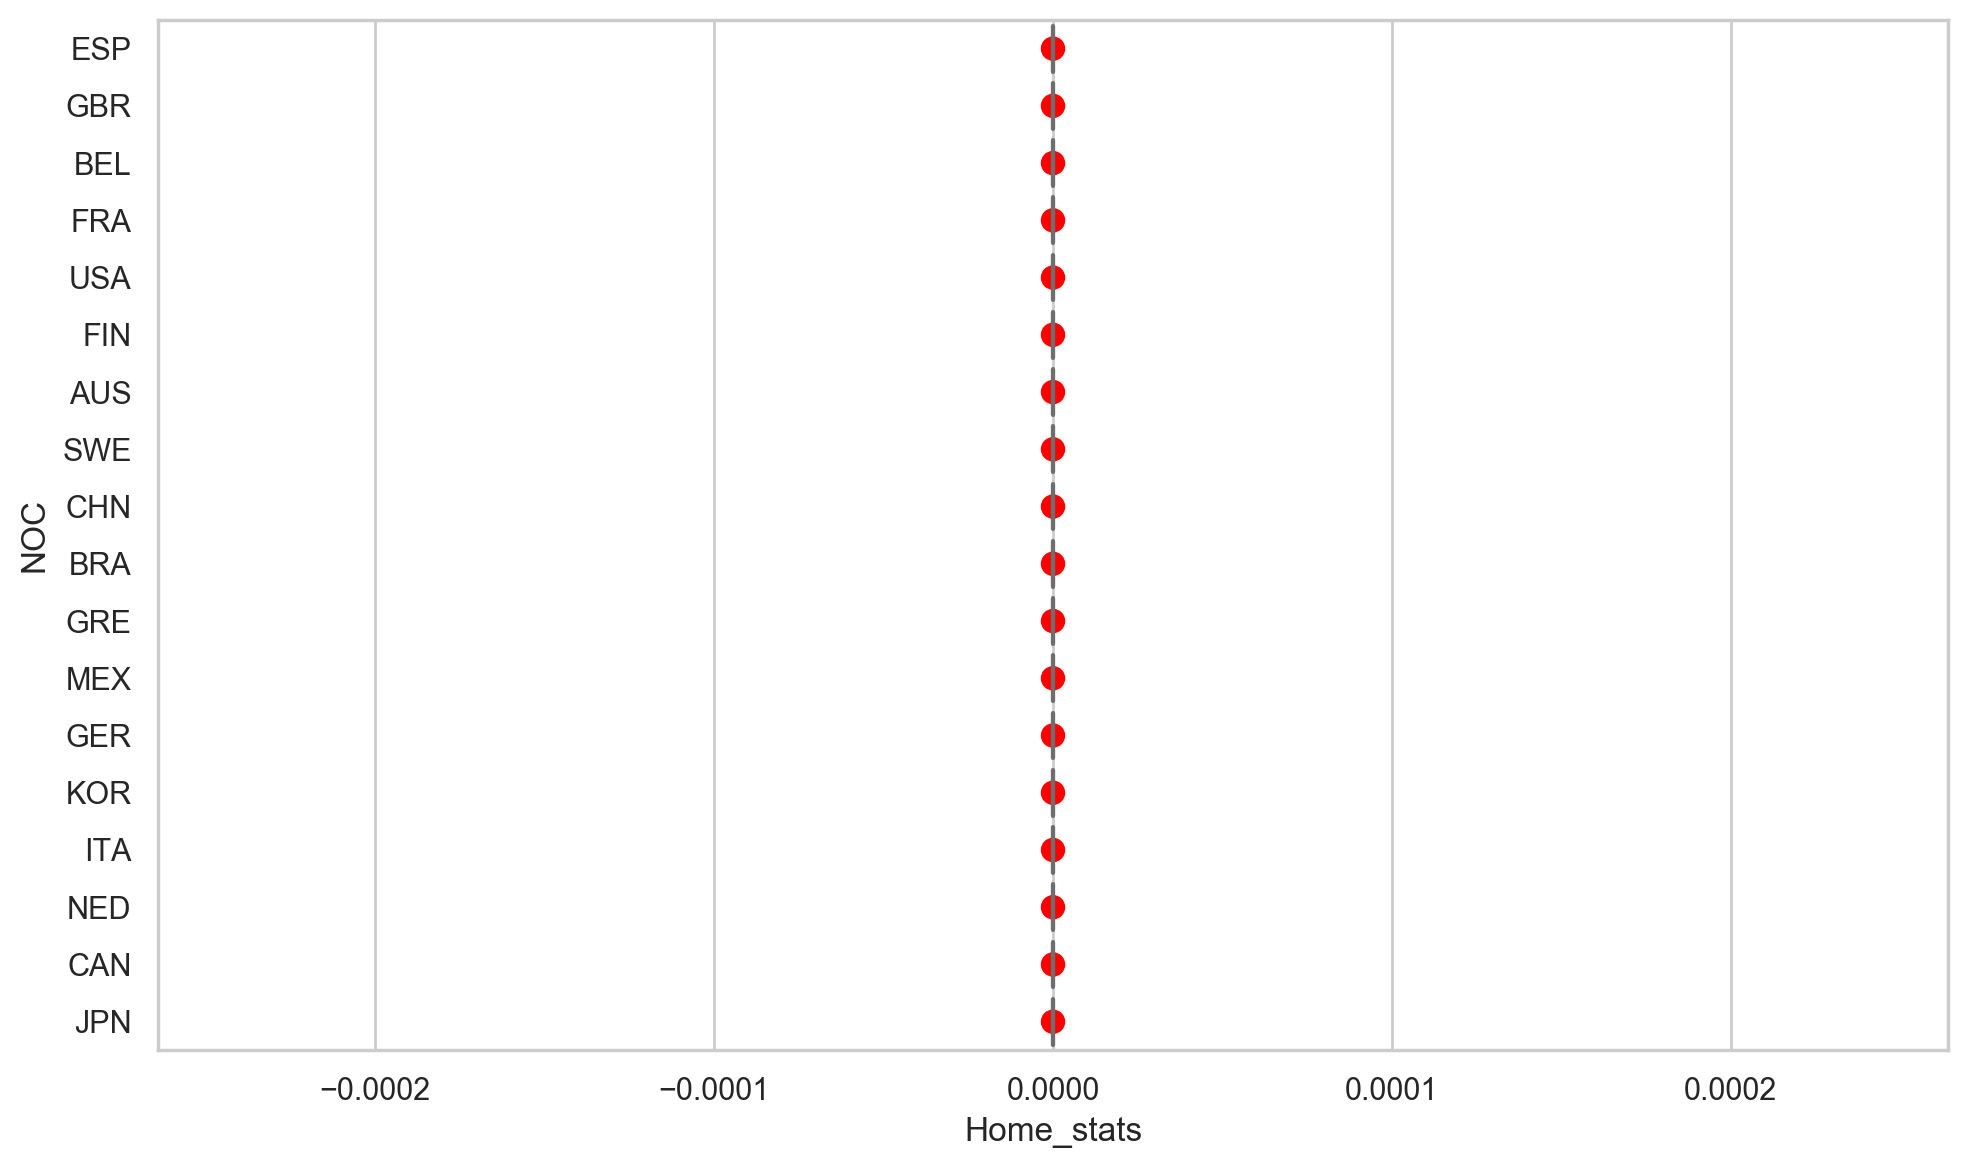

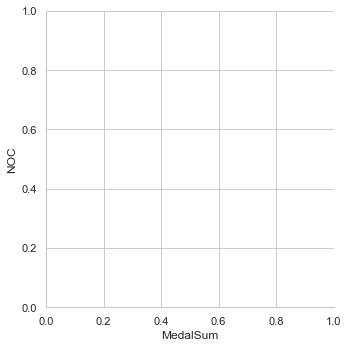

In [15]:
cities = pd.read_csv('./data/raw/olym.csv')
#set(df['City'])^set(cities['City'])  # チェック用

# 結果データの都市名リスト化
df_city = list(set(df['City'])-set(cities['City']))
cities_city = list(set(cities['City'])-set(df['City']))

# アルファベット順にしておく
df_city.sort()
cities_city.sort()

# 2つのリストから辞書作成
rename_city = dict(zip(cities_city,df_city))

# 都市名の統一化
cities.replace(rename_city,inplace=True)

# 不要な列名削除、列名微調整、都市名で結合して、最後に夏季五輪だけ抽出！
cities.drop(['Summer','Winter'],axis=1,inplace=True)
cities.rename(columns={'NOC':'NOC_host'},inplace=True)
df_withcity = pd.merge(df,cities,on=['City','Year'],how='left')
sub_df_withcity = df_withcity.query('Season == "Summer"')


sub_df_withcity
# メダルのダミー変数
tmp = pd.get_dummies(sub_df_withcity['Medal'])

# メダルのダミー変数を結合
sub_df_withcity = pd.concat([sub_df_withcity,tmp],axis=1)

#メダル総数カラム追加
sub_df_withcity['MedalSum'] = sub_df_withcity['Silver'] + sub_df_withcity['Bronze'] + sub_df_withcity['Gold']

sub_df_home = pd.DataFrame(columns=['Year','MedalSum','NOC','Home_stats'])
host_list = list(sub_df_withcity.NOC_host.unique())
host_list.remove('RUS') # RUS=ロシアは、ロシアになってからは夏季五輪を開催していないので削除

for i in host_list:
    tmp= sub_df_withcity.query('NOC == @i').groupby('Year').sum().reset_index()[['Year','MedalSum']]
    tmp['NOC'] = i
    tmp['Home_stats'] = sub_df_withcity.query('NOC_host == @i & NOC == @i').groupby('Year')\
                        .sum().reset_index()['MedalSum'].mean()
    sub_df_home = pd.concat([sub_df_home,tmp])
    
sns.set_style("whitegrid")

#fig, ax = plt.subplots(figsize=(8, 3))

fig = plt.figure(figsize=(10,6),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 
ax = fig.add_subplot(1,1,1)

sns.catplot(x='MedalSum',y='NOC',kind='box',color='lightcoral',\
                 data=sub_df_home,showfliers=False,orient='h',ax=ax)

sns.pointplot(x='Home_stats',y='NOC',data=sub_df_home,color='red',markers='o',fontsize=10,join=False,ax=ax)


fig.tight_layout()
plt.show()



### INSIGHT

- 赤い点が自国開催時のメダル獲得数。ボックスプロットは他国開催時のメダル獲得数。
- どの国も、他国開催時より自国開催時のほうが良い結果を残しています

---

## 6-3 オリンピック選手たちの分析

次は、各国の選手にフォーカスしてみます。
### 6-3-1 選手たちの寿命は？２０歳前後が活躍してそうですけど、どうですか？



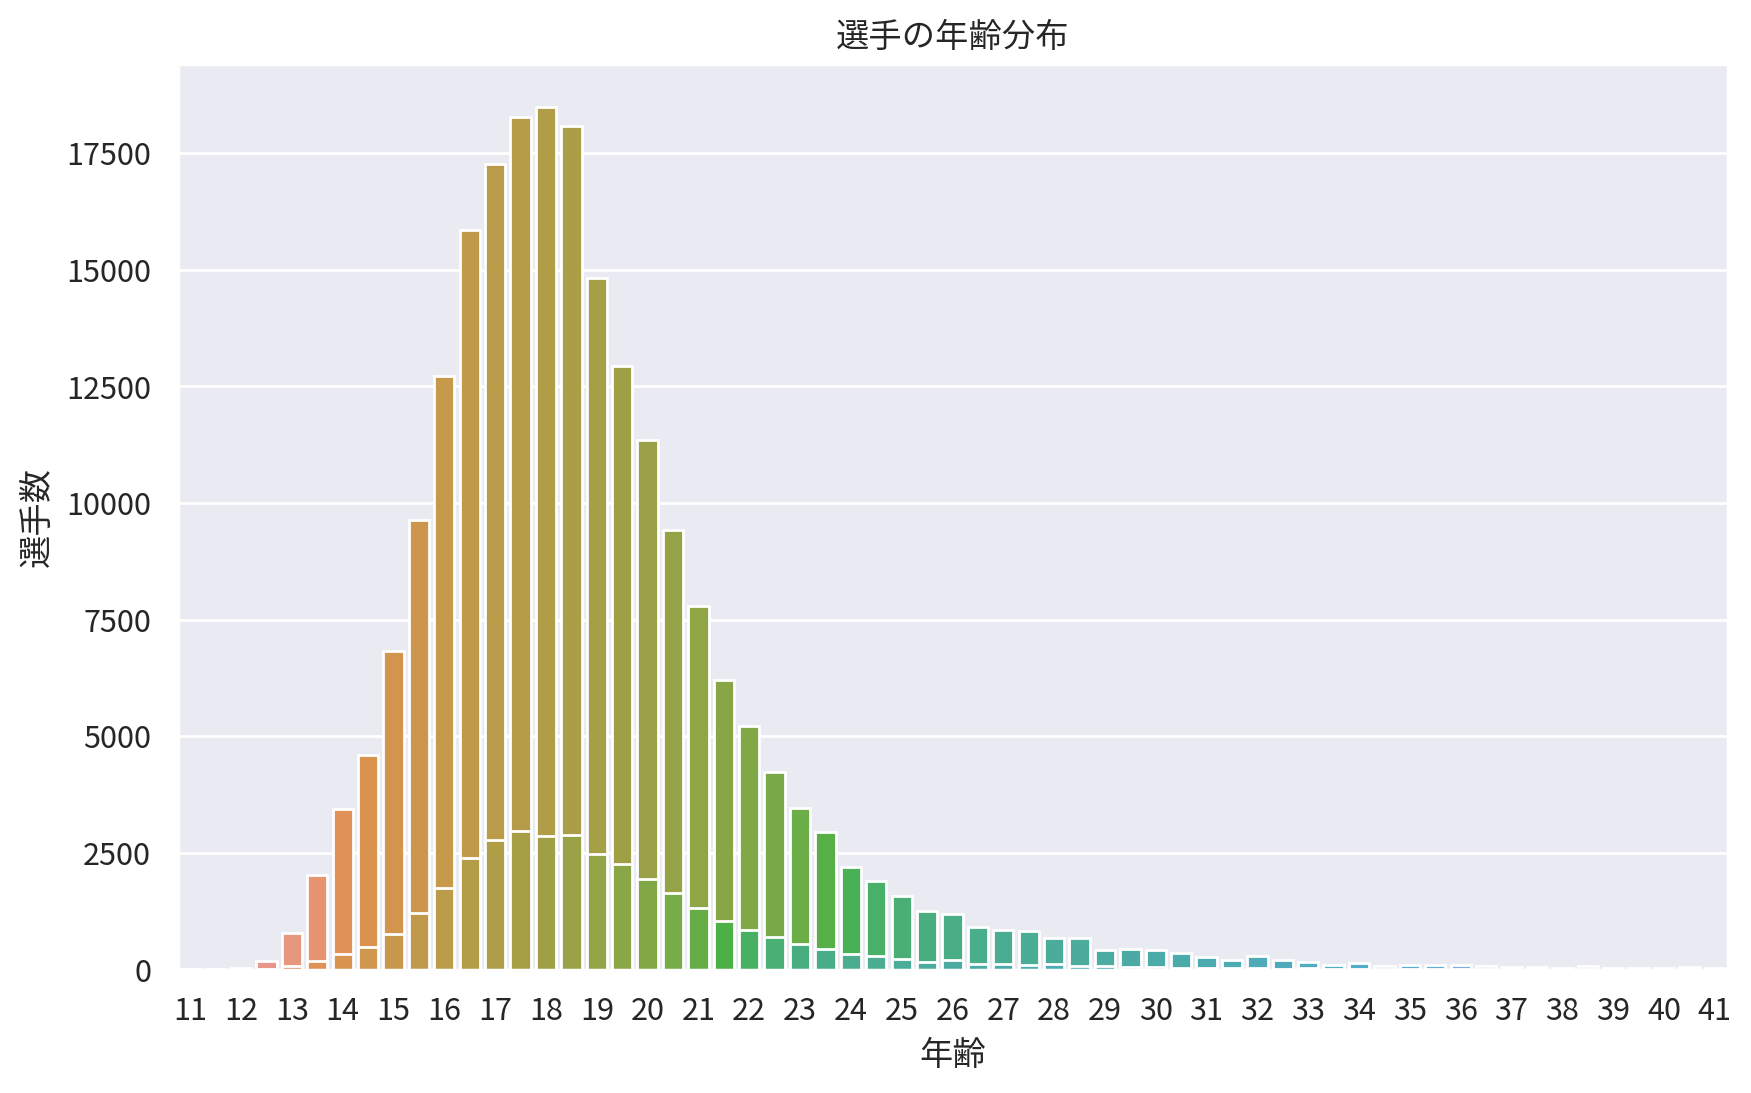

In [31]:
sub_df['Age'] = sub_df['Age'].astype(int)
fig , ax = plt.subplots(figsize=(10,6),dpi=200)
ax = sns.countplot(sub_df.loc[:,'Age'])
ax2 = sns.countplot(sub_df.query('MedalSum > 0')['Age'])

ax.set_title('選手の年齢分布')
ax.set_xlabel('年齢')
ax.set_ylabel('選手数')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.show()

In [17]:
print('参加者全員の年齢:\n',)
print(sub_df.loc[:,'Age'].describe())
print("-"*30)
print('メダリストの年齢:\n',)
print(sub_df.query('MedalSum > 0')['Age'].describe())

参加者全員の年齢:

count    222552.000000
mean         25.730701
std           6.676482
min          10.000000
25%          21.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64
------------------------------
メダリストの年齢:

count    34088.000000
mean        25.931589
std          6.056468
min         10.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         73.000000
Name: Age, dtype: float64


### INSIGHT

- 参加者もメダリストも、共に平均年齢は25歳です
- 分布を見ると18歳前後が最多です
- 参加者の最年長が97歳!?
- 70歳オーバーのメダリスト!?
- 10歳のメダリスト!?
--- 

### 6-3-2 中年男性や中年女性でも獲得できるメダルはありますか？



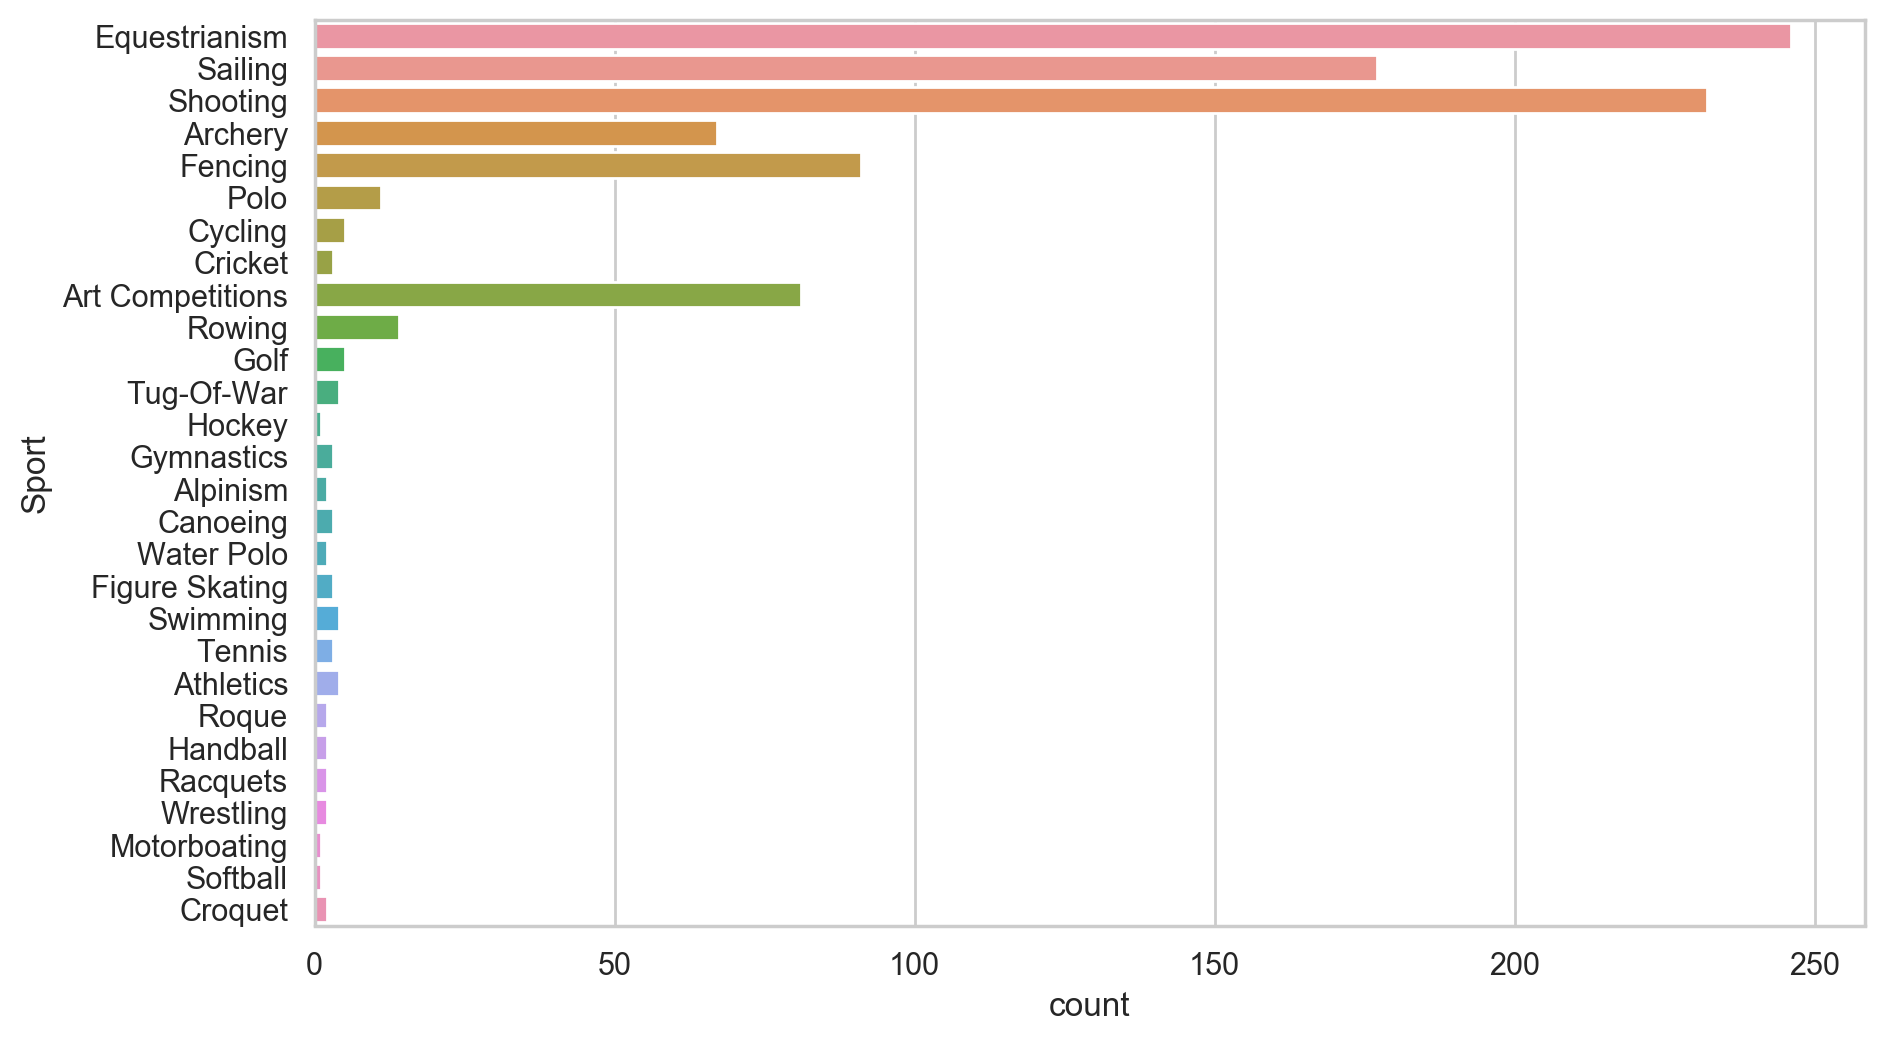

In [18]:
#　夏季五輪のメダリストリスト
medalist_df = sub_df[sub_df['MedalSum'] > 0].copy()
medalist_df_40 = medalist_df[medalist_df["Age"]>40]

fig , ax = plt.subplots(figsize=(10,6),dpi=200)
ax = sns.countplot(y='Sport',data=medalist_df_40,orient='v')



In [19]:
# オリンピック参加者の平均年齢、平均体重、平均身長
tmp = sub_df.groupby('Sport').mean()[['Age','Height','Weight']]
# 年齢の降順
tmp.sort_values('Age',ascending=False).head(10)

,Age,Height,Weight
Sport,,,
Roque,53.250000,178.564753,75.565515
Art Competitions,45.552823,171.801158,72.920454
Polo,35.336842,176.428571,75.565515
Alpinism,35.250000,175.834516,71.633868
Equestrianism,34.384931,175.024010,68.644973
Croquet,34.000000,175.116033,70.599224
Shooting,33.526468,174.651199,75.930832
Motorboating,33.176471,180.214341,75.990525
Jeu De Paume,32.454545,176.909091,75.565515


### INSIGHT

- 馬術、セーリング、シューティング、アーチェリーなど高貴なスポーツは中年でも活躍しているらしい
- 競技参加者の平均年齢が40歳を超えている競技は2つ、RoqueとArt Competitionsです。ただ、どちらも現在は存在しない競技かもしれないです
---

### 6-3-3 マイケル・フェルプスだっけ？たくさんメダル獲得している人いますよね？



In [20]:
medals = sub_df.groupby('Name').sum().sort_values('MedalSum',ascending=True)[['Bronze','Silver','Gold','No Medal','MedalSum']]
medals = medals.reset_index()

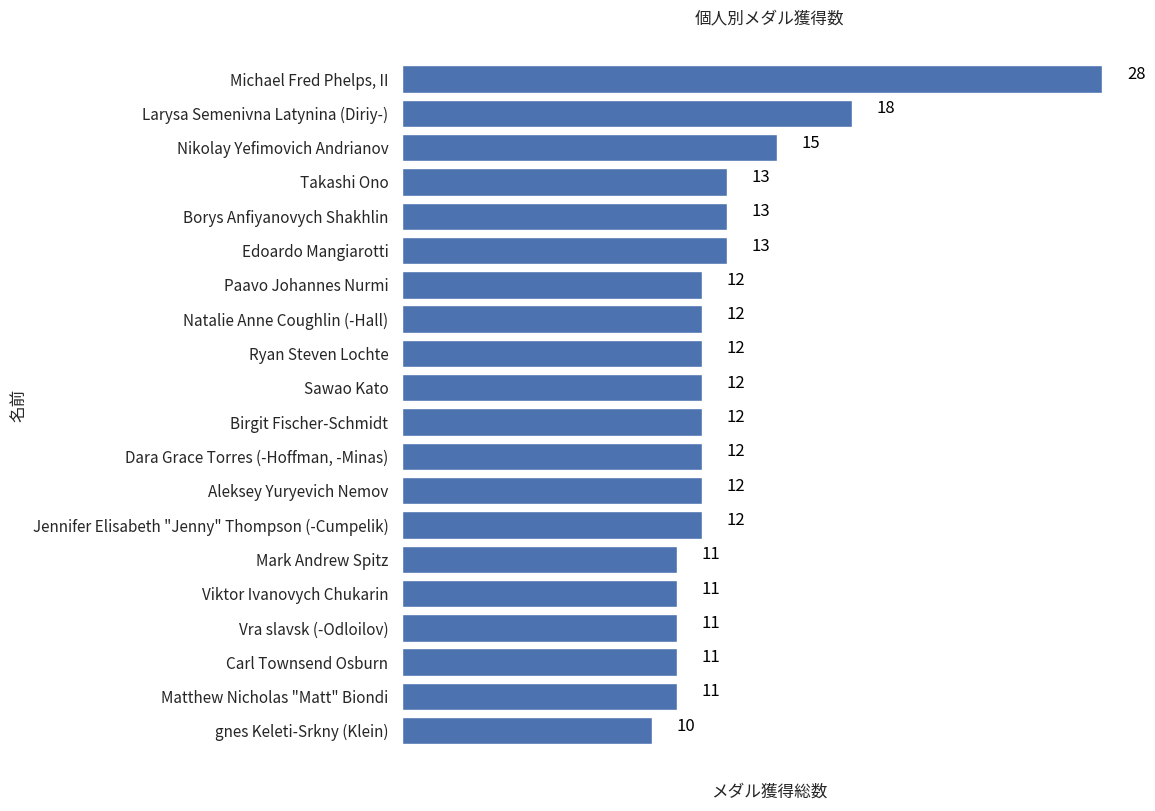

In [32]:
# 1. データ準備
x = medals['Name'].tail(20)
y = medals['MedalSum'].tail(20)


# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.barh(x,y,color='C0') #棒グラフ
#ax.plot(x,y) 線グラフ ,   ax.barh(x,)横持ち帽グラフ


# 5. グラフタイトルと軸の調整

## y軸 x軸の枠を消す場合
ax.tick_params(bottom=False,left=False,labelbottom=False) 

##四方の枠(spines)を消す 1
sides = ['left','right','top','bottom'] 
[ax.spines[side].set_visible(False) for side in sides] 

ax.set_title('個人別メダル獲得数')
ax.set_xlabel('メダル獲得総数')
ax.set_ylabel('名前')
ax.set_facecolor((1,1,1,0))

## データラベルを表示
for i, value in enumerate(medals.tail(20)['MedalSum']):
    ax.text(value+1,i,f'{value:,.0f}',color='black')
    
    
fig.tight_layout()
plt.show()

### INSIGHT

- 第１位は、堂々のマイケル・フェルプス！予想通り！
- なんと、TAKASHI ONOとSAWAKO KATOさん、日本人ですね。
---

### 6-3-4 何度も何度もオリンピックに出てる人たちっていますよね？



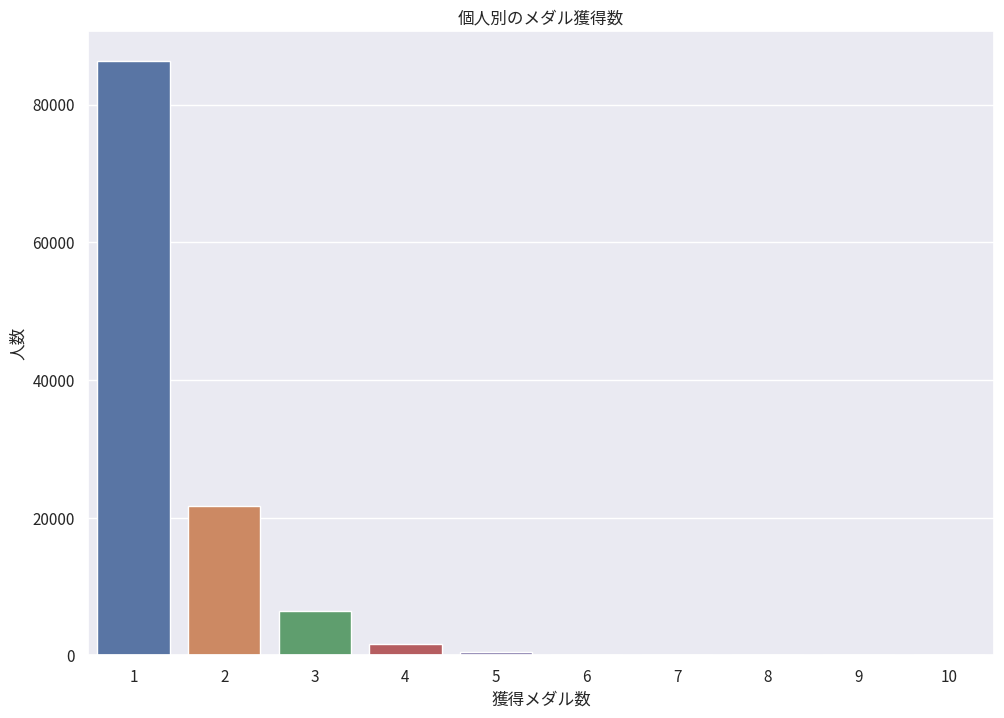

In [36]:
tmp = sub_df.groupby('ID').nunique()['Year'].reset_index()


fig , ax = plt.subplots(figsize=(11.69,8.27),dpi=100)
ax = sns.countplot(tmp['Year'])
ax.set_title('個人別のメダル獲得数')
ax.set_xlabel('獲得メダル数')
ax.set_ylabel('人数')

plt.show()

In [23]:
tmp_8 = tmp[tmp['Year']>=8]
multijoin_df = pd.DataFrame(columns=['ID','名前','最年少','最年長','国','競技','初回参加年','最新参加年','参加回数','メダル獲得数'])

for i in tmp_8['ID']:
    tmp_df = sub_df.query('ID == @i').reset_index()
    tmp_series = pd.Series([
        tmp_df.loc[0,'ID'],tmp_df.loc[0,'Name'],tmp_df.loc[0,'Age'],tmp_df.loc[tmp_df.shape[0]-1,'Age'],\
        tmp_df.loc[0,'region'],tmp_df.loc[0,'Sport'],tmp_df.loc[0,'Year'],tmp_df.loc[tmp_df.shape[0]-1,'Year'],\
        tmp_df['Year'].nunique(),tmp_df['MedalSum'].sum()],
        index = multijoin_df.columns
    ) 
    multijoin_df = multijoin_df.append(tmp_series,ignore_index=True)
    
    
print('歴代最多出場選手たち')
print("-"*50)
multijoin_df.sort_values('参加回数',ascending=False)

歴代最多出場選手たち
--------------------------------------------------


,ID,名前,最年少,最年長,国,競技,初回参加年,最新参加年,参加回数,メダル獲得数
8,79855,Ian Millar,25,65,Canada,Equestrianism,1972,2012,10,1
7,65378,Afanasijs Kuzmins,29,65,Russia,Shooting,1976,2012,9,2
9,99155,Hubert Raudaschl,22,53,Austria,Sailing,1964,1996,9,2
0,14388,Francisco Boza Dibos,15,51,Peru,Shooting,1980,2016,8,1
1,26880,Rajmond Debevec,21,49,Serbia,Shooting,1984,2012,8,3
2,28051,Piero D'Inzeo,25,53,Italy,Equestrianism,1948,1976,8,6
3,28052,Raimondo D'Inzeo,23,51,Italy,Equestrianism,1948,1976,8,6
4,32458,Paul Bert Elvstrm,20,60,Denmark,Sailing,1948,1988,8,4
5,51618,Josefa Idem-Guerrini,19,47,Germany,Canoeing,1984,2012,8,5
6,61572,Durward Randolph Knowles,30,70,UK,Sailing,1948,1988,8,2


### INSIGHT
- 過去に８回以上（最短でも３２年間必要）、夏季オリンピックに出場した選手は１０人いました
- 最多で１０回、つまり４０年も選手として活躍していたことになります
- ２０１６年の前回大会に出場していた３名（Francisco Boza Dibos、Nino Salukvadze (-Machavariani)、Lesley Allison Thompson-Willie）は東京五輪も出ますか？期待してます！
---

### 6-3-5 何歳から参加できるんですか？逆に、何歳まで可能性あるんですか？



In [24]:
print('-'*50)
print('オリンピック出場最年少は',sub_df['Age'].min(),'歳')
print('オリンピック出場最年長は',sub_df['Age'].max(),'歳')
print('-'*50)

print('-'*50)
print('メダリスト最年少は',sub_df[sub_df['MedalSum'] >=1]['Age'].min(),'歳')
print('メダリスト最年長は',sub_df[sub_df['MedalSum'] >=1]['Age'].max(),'歳')
print('-'*50)


--------------------------------------------------
オリンピック出場最年少は 10 歳
オリンピック出場最年長は 97 歳
--------------------------------------------------
--------------------------------------------------
メダリスト最年少は 10 歳
メダリスト最年長は 73 歳
--------------------------------------------------


### INSIGHT

- 10歳で出場しているようなので、10歳から出場できるのでしょう
- 最年長は97歳という怪しい記録です。要調査
---

## 6-4 オリンピック競技の分析
### 6-4-1 最近、野球なくなりましたよね？競技って増えてるんですか？減ってるんですか？

In [25]:
tmp_sport = sub_df.groupby('Year')['Sport'].nunique().reset_index()
tmp_event = sub_df.groupby('Year')['Event'].nunique().reset_index()

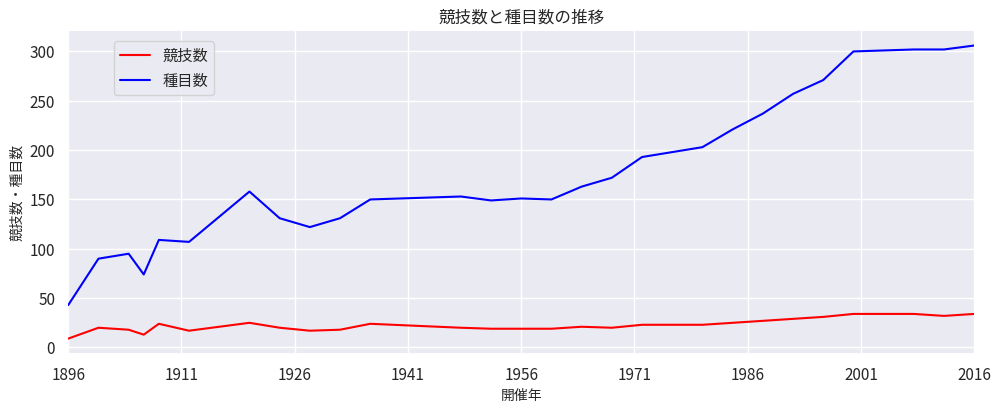

In [38]:
fig = plt.figure(figsize=(11.69,4.27),dpi=100,facecolor="white", edgecolor="white", linewidth=2) 
ax = fig.add_subplot(1,1,1)

sns.lineplot(tmp_sport.Year,tmp_sport.Sport,color='red')
sns.lineplot(tmp_sport.Year,tmp_event.Event,color='blue')
ax.set_title('競技数と種目数の推移',fontsize=12)
ax.set_xlabel('開催年',fontsize=10)
ax.set_ylabel('競技数・種目数',fontsize=10)
ax.set_xlim(1896,2016)
sides = ['left','right','top','bottom'] 
[ax.spines[side].set_visible(False) for side in sides] 
ax.xaxis.set_major_locator(ticker.LinearLocator(9))
ax.legend(['競技数','種目数'],loc=(0.05,0.8))
plt.show()

In [41]:

# s = sub_df.groupby(['Sport','Year'])['Event'].nunique().reset_index()
# s[s['Year']==2016]

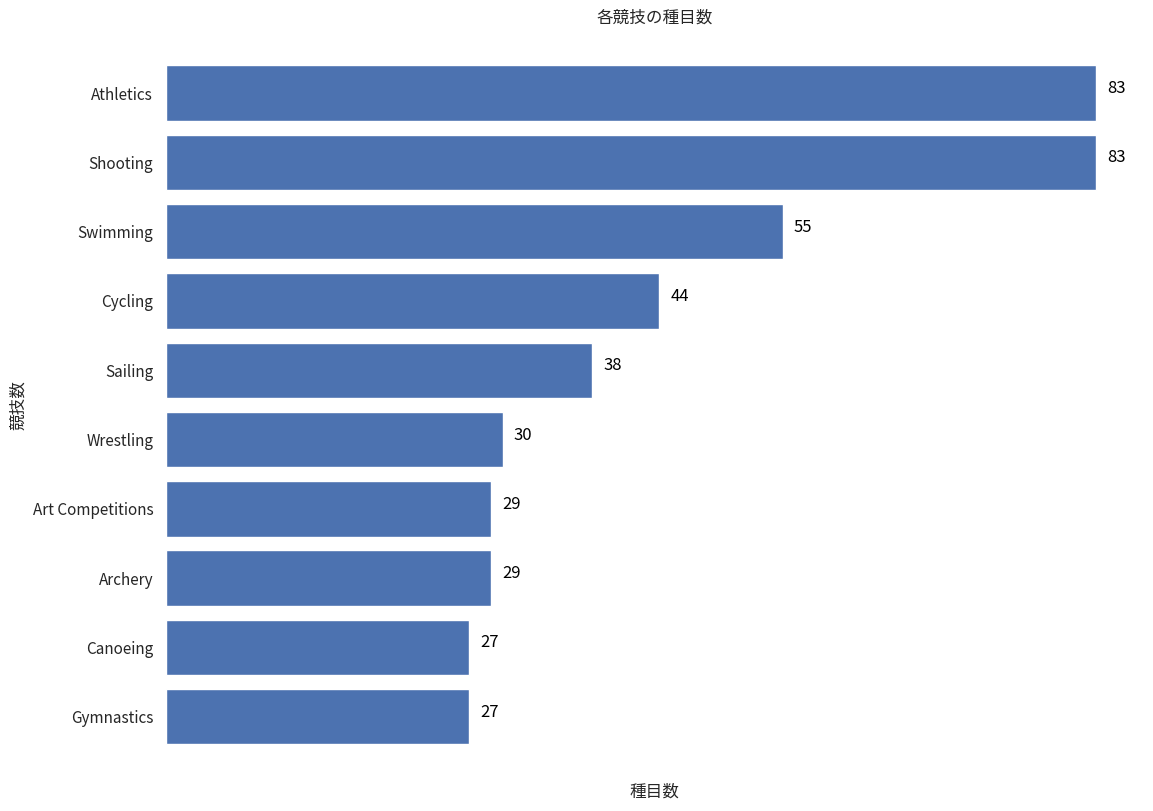

In [39]:
# 1. データ準備
tmp_event_rank = sub_df.groupby('Sport')['Event'].nunique().sort_values(ascending=True)
tmp_event_rank = tmp_event_rank.reset_index()
x = tmp_event_rank['Sport'].tail(10)
y = tmp_event_rank['Event'].tail(10)


# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.barh(x,y,color='C0')
#ax.plot(x,y) 線グラフ ,   ax.barh(x,)横持ち帽グラフ


# 5. グラフタイトルと軸の調整

## y軸 x軸の枠を消す場合
ax.tick_params(bottom=False,left=False,labelbottom=False) 

##四方の枠(spines)を消す 1
sides = ['left','right','top','bottom'] 
[ax.spines[side].set_visible(False) for side in sides] 

ax.set_title('各競技の種目数')
ax.set_xlabel('種目数')
ax.set_ylabel('競技数')
ax.set_facecolor((1,1,1,0))

## データラベルを表示
for i, value in enumerate(tmp_event_rank.tail(10)['Event']):
    ax.text(value+1,i,f'{value:,.0f}',color='black')
    
    
fig.tight_layout()
plt.show()

### INSIGHT
- 競技数も種目数も増えています。特に同一競技の種目数が増えているようです。
- 陸上競技（Athletics）と射撃（Shooting）は群を抜いて多いようです
- 直感的には個人競技は種目が多い気がしますね
---

### 6-4-2 参加国が少ない、狙い目の競技ってありますか？



In [42]:
df_2016_minor = sub_df[sub_df['Year']==2016]
df_2016_minor = df_2016_minor.groupby('Sport')['NOC'].nunique().reset_index()
df_2016_minor = df_2016_minor[df_2016_minor['NOC']<= 20].reset_index()
df_2016_minor = df_2016_minor.drop('index',axis=1)
print('2016年オリンピックで、参加国が２０カ国以下の競技')
print('-'*50)
df_2016_minor

2016年オリンピックで、参加国が２０カ国以下の競技
--------------------------------------------------


,Sport,NOC
0,Basketball,17
1,Handball,20
2,Hockey,16
3,Rugby Sevens,14
4,Trampolining,17
5,Volleyball,19
6,Water Polo,14


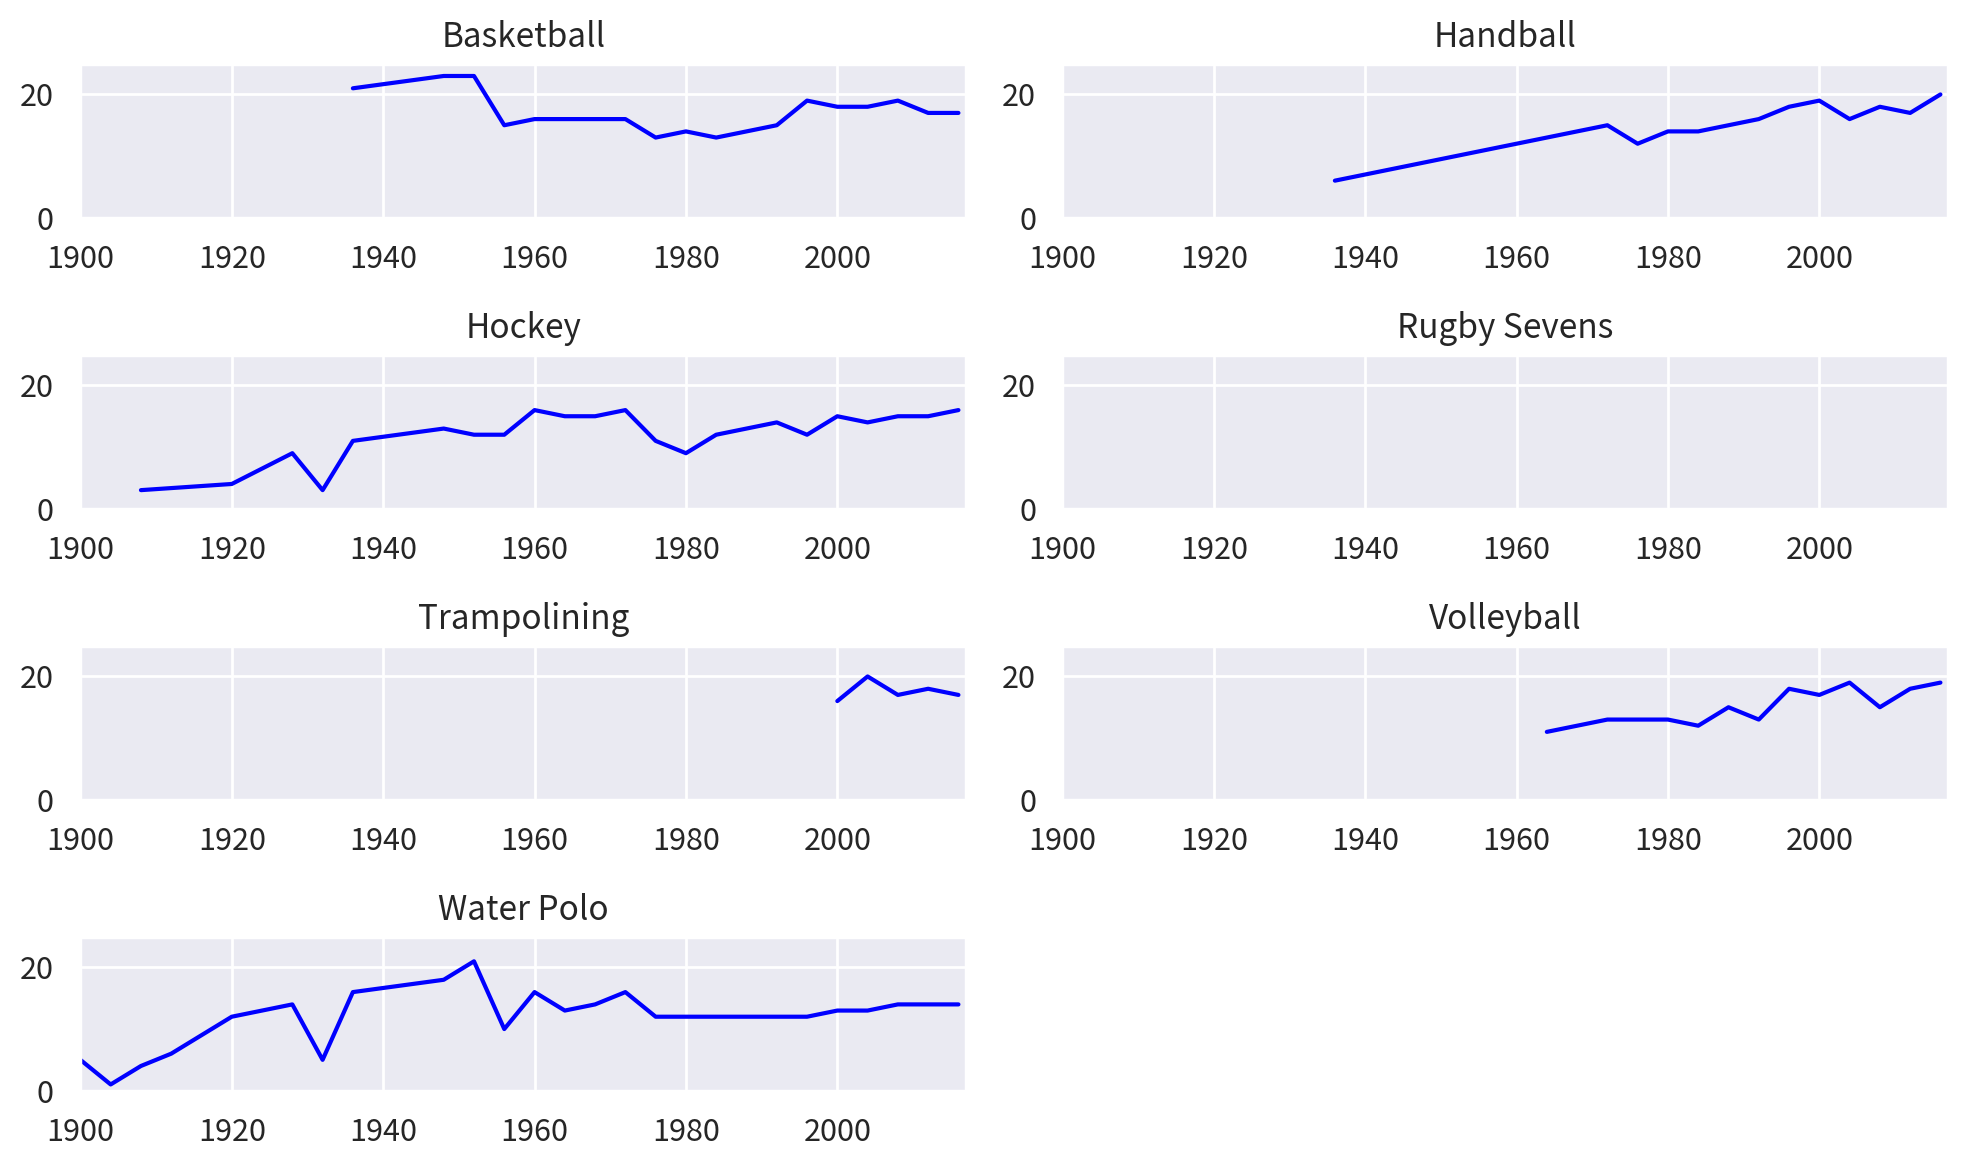

In [43]:
fig  = plt.figure(figsize=(10,6),dpi=200,facecolor='white',edgecolor='white',linewidth=2)
ax = []
sides = ['left','right','top']

for i , sport in enumerate(df_2016_minor['Sport']):
    tmp = sub_df.groupby(['Sport','Year'])['region'].nunique().reset_index()
    ax.append(fig.add_subplot(4,2,i+1))
    ax[i].plot(tmp.query('Sport == @sport ')['Year'],tmp.query('Sport == @sport')['region'],color='blue')
    ax[i].set_xlim(1900,2017)
    ax[i].set_ylim(0,25)
    ax[i].set_title(sport)

#fig.suptitle('This is a somewhat long figure title', fontsize=16,x=0.5,y=1.05)

fig.tight_layout()
plt.show()

### INSIGHT
- 参加国が20以下の競技は7競技あります。バレーボールやバスケットボールなど人気がありそうな競技でもオリンピック参加国では少ないようです。
- トランポリン以外はチーム競技です。トランポリンなら個人戦で戦えますので、中長期的に取り組めば可能性ありますかね？

---

### 6-4-3 日本が参加してない競技ってあるんですか？

2016年の夏季オリンピックで日本が参加していない競技を探す



In [44]:
df_2016 = sub_df[sub_df['Year']==2016]
print('日本が参加してない競技:',set(df_2016['Sport'])-set(df_2016[df_2016['region']=='Japan']['Sport']))

日本が参加してない競技: {'Handball', 'Beach Volleyball'}


### INSIGHT

- ビーチバレーボールとハンドボールは未参加だった模様です。調べてみたら、アジア予選敗退で出れなかったようです。
- ハンドボール女子日本代表は、1976年のモントリオールで初出場して5位、それ以外は予選敗退で未出場。
- ハンドボール男子日本代表は、複数回出場していますが、1988年のソウルを最後に出場していません。
- ビーチバレーは2020東京五輪では日本は開催国枠として男女各1チームの出場が確定しています。初出場です！

---

### 6-4-4 全ての国が参加してる大人気競技ってあるんですか？

なんとなく、オリンピックといえば陸上競技な気がするので、陸上競技は参加国全てが出場している予感。2016年データをもとに探してみます。


In [45]:
print('2016年夏季オリンピックの参加国総数:',df_2016.region.nunique())
print('-'*30)
print('出場国が一番多い競技:\n',df_2016.groupby('Sport')['region'].nunique().sort_values(ascending=False).head(3))
print('-'*30)
print('陸上（Athletics)に参加してない国:\n',set(df_2016.region.unique())-set(df_2016[df_2016['Sport']=="Athletics"]['region']))


2016年夏季オリンピックの参加国総数: 204
------------------------------
出場国が一番多い競技:
 Sport
Athletics    197
Swimming     171
Judo         135
Name: region, dtype: int64
------------------------------
陸上（Athletics)に参加してない国:
 {'Vanuatu', 'Nauru', 'Bhutan', 'Individual Olympic Athletes', 'Aruba', 'Liechtenstein', 'Iraq'}


### INSIGHT
- 2016年夏季オリンピックの参加国数は204で、そのうち197カ国が陸上競技のいずれかに出場しています。陸上競技が出場国が一番多い競技です。
- 7カ国が陸上競技に参加していません。知らない国が多いので少し調べました。
    - Aruba :アルバはカリブ海に浮かぶ島です。オランダ王国を構成する4つの構成国のひとつです。人口11万人程度です。
    - Bhutan　:ブータンというと、『世界一幸福度が高い国』ですね
    - Individual Olympic Athletes : オリンピックの独立参加選手団
    - Nauru : ナウル。国土面積も人口も世界で3番目に小さい。国土面積が世界一小さい国はバチカン市国、その次はモナコ公国。人口はバチカン、ツバルに続いて3番目
    - Iraq : サダム・フセインで有名なイラク
    - Vanuatu : バヌアツはオーストラリアの東側に位置する国。非常に治安の良いみたいです
    - Liechtenstein :リヒテンシュタイン公国。スイスとオーストリアに囲まれたミニ国家の一つ。

### 6-4-5 例えば柔道って、重ければ勝てるんですか？体重と身長が関係しそうな競技ってどれですか？

結果テーブルにある個人に関する特徴量は、所属国、年齢、体重、身長です。ここでは体重と身長が相関する競技を見てみます。

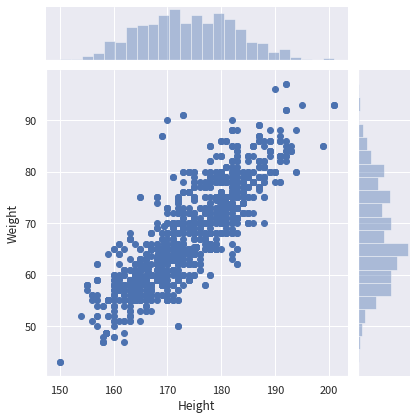

In [46]:
sns.jointplot(data=sub_df[sub_df['Sport']=='Badminton'],x='Height',y='Weight')

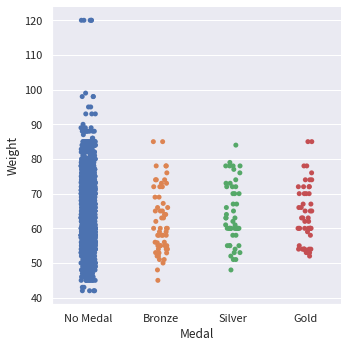

In [47]:
sns.catplot(x='Medal',y='Weight',data=sub_df[sub_df['Sport']=='Table Tennis'],kind='strip')
plt.show()

/Users/me/Dev/.venv/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


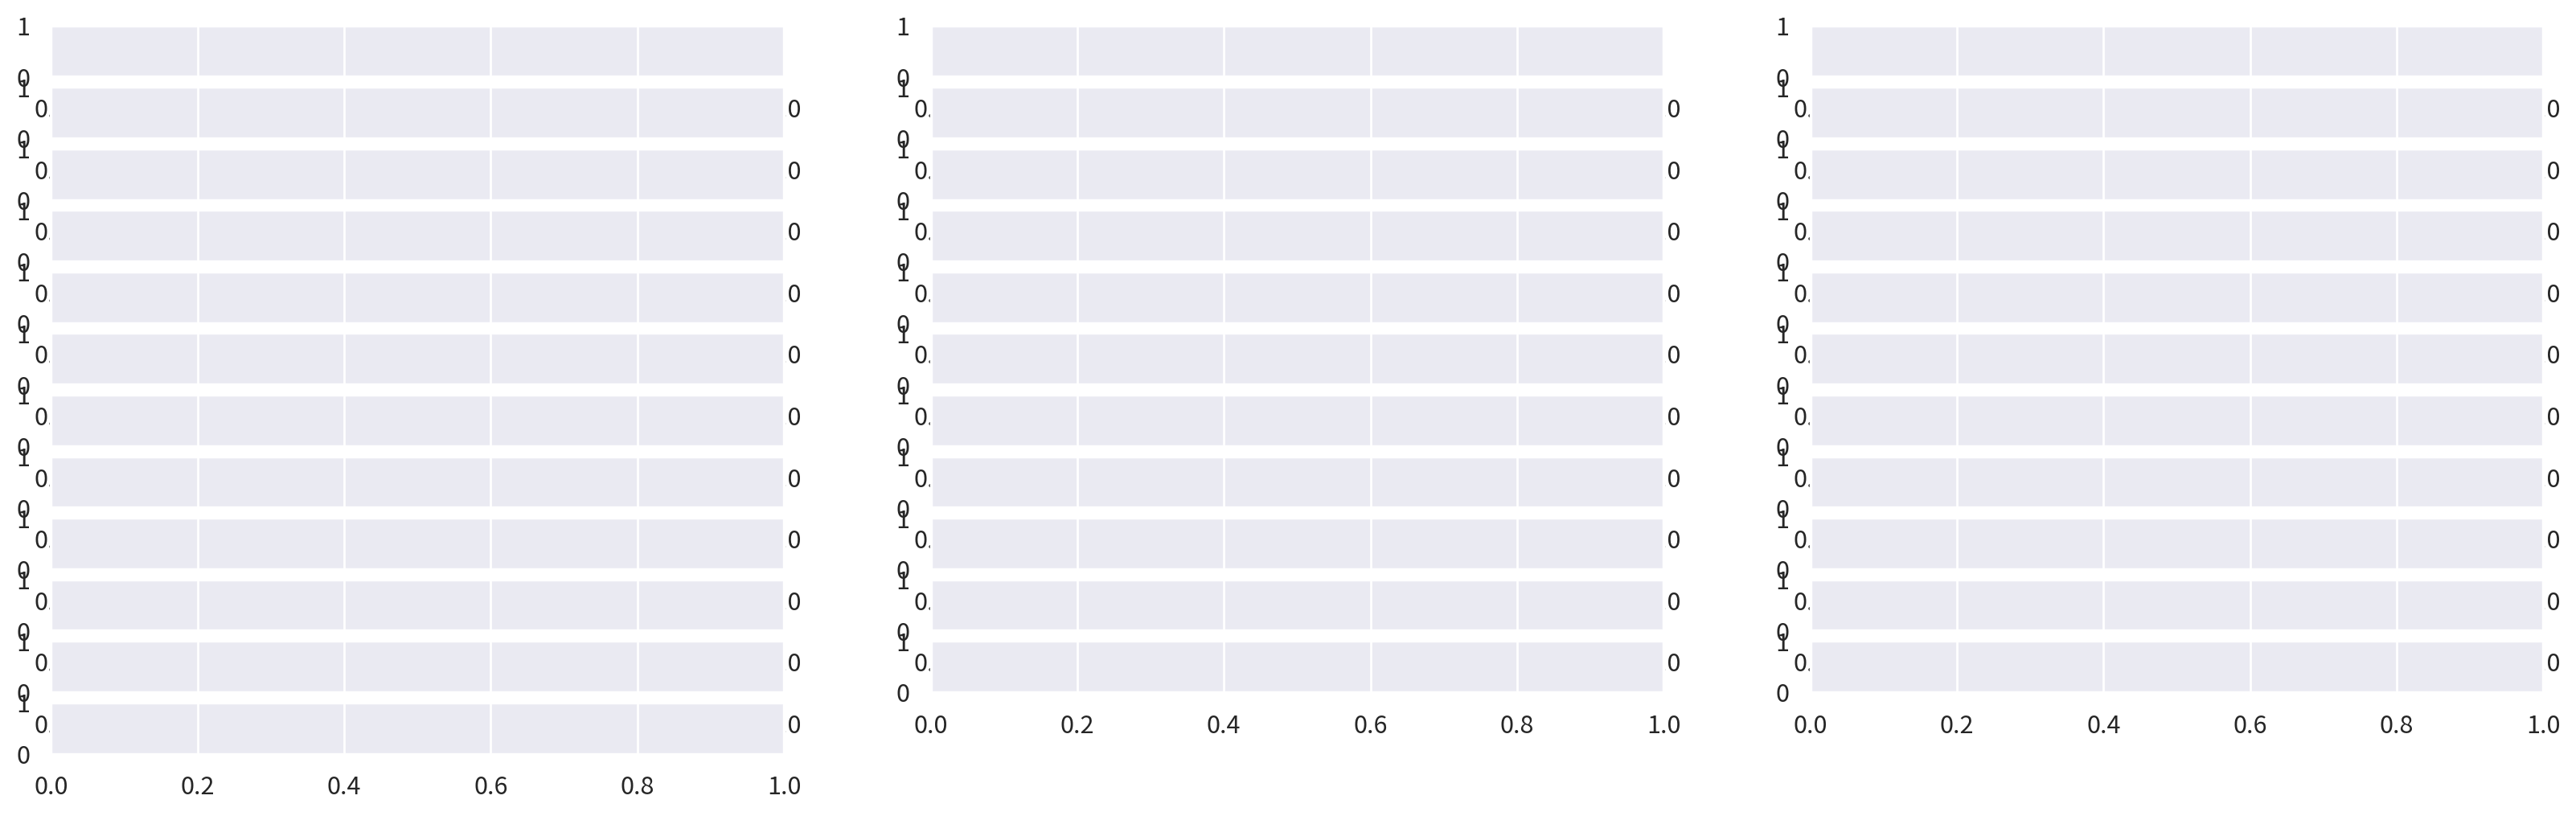

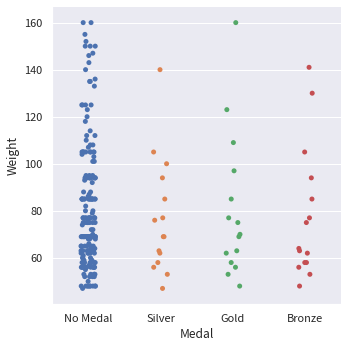

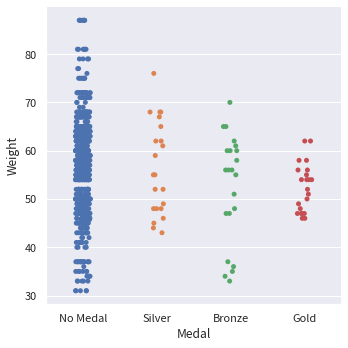

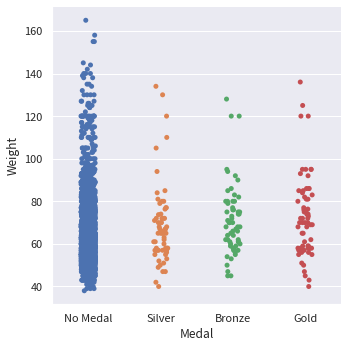

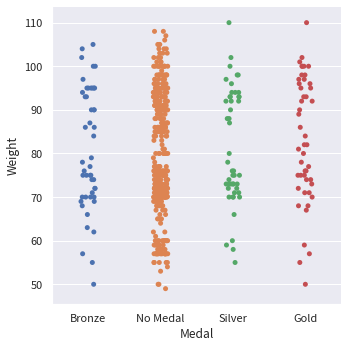

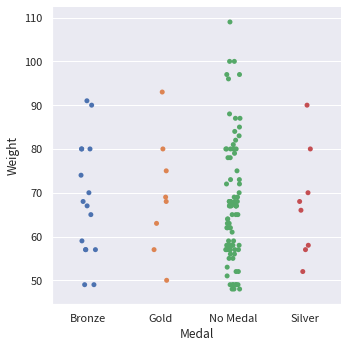

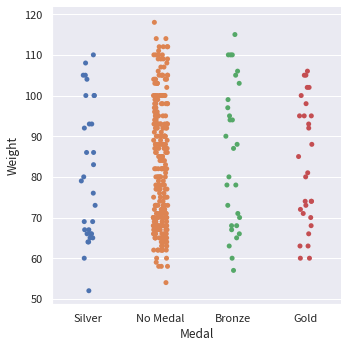

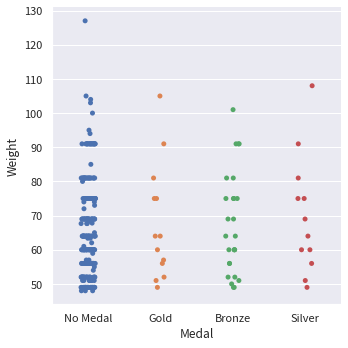

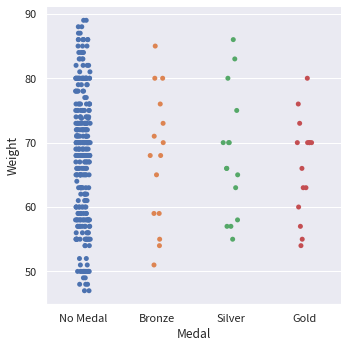

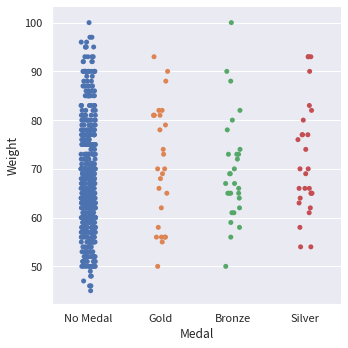

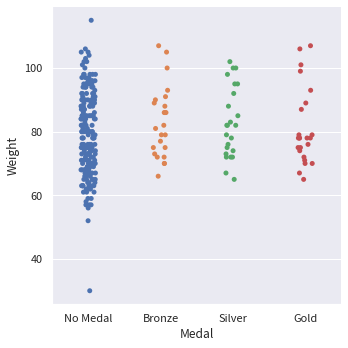

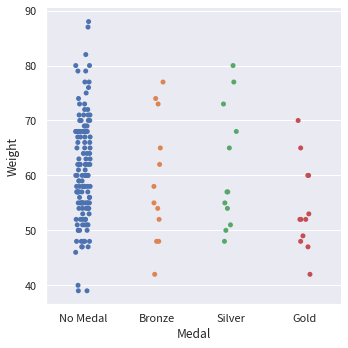

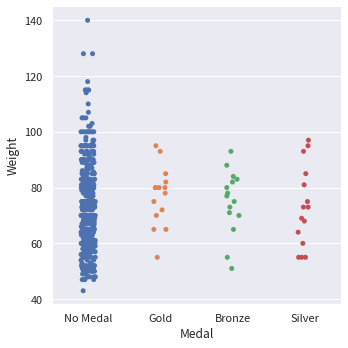

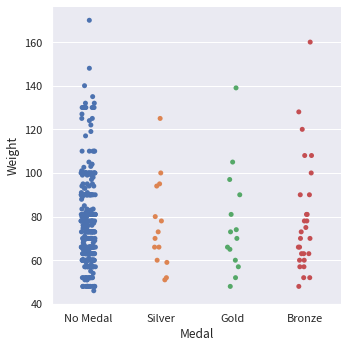

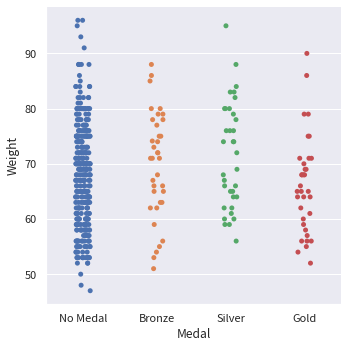

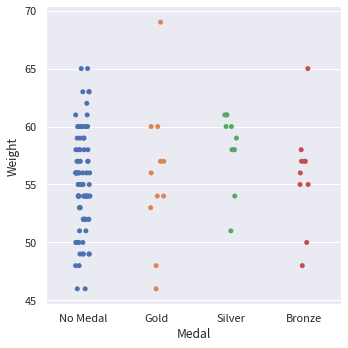

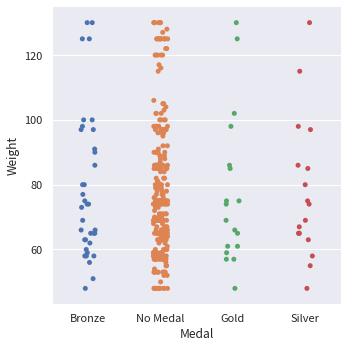

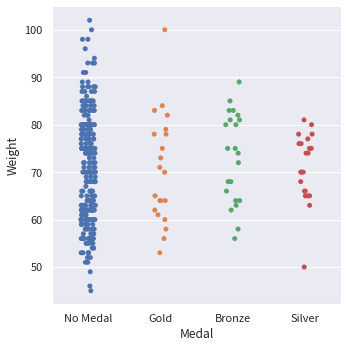

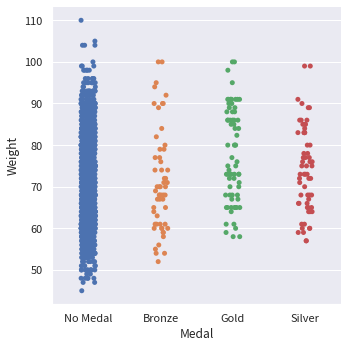

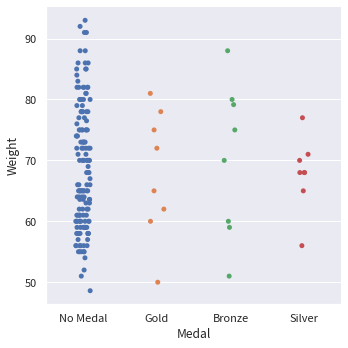

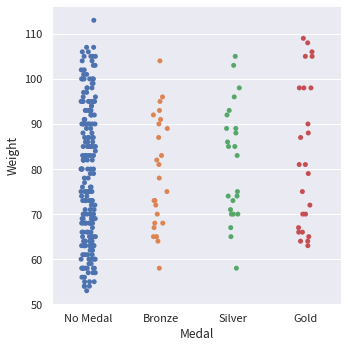

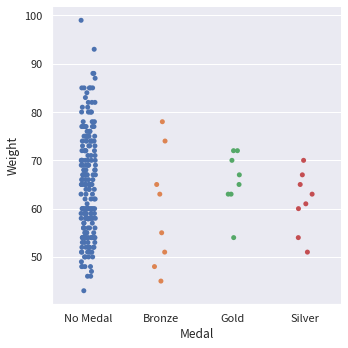

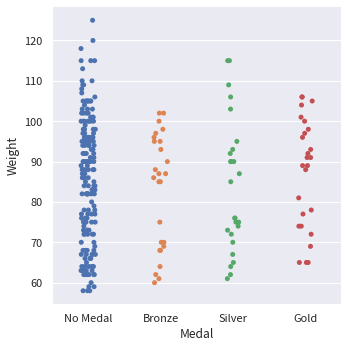

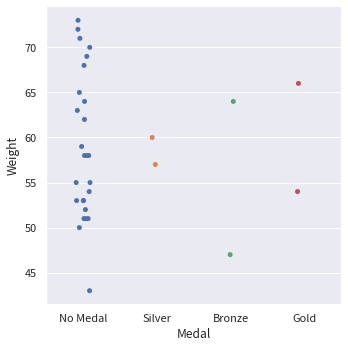

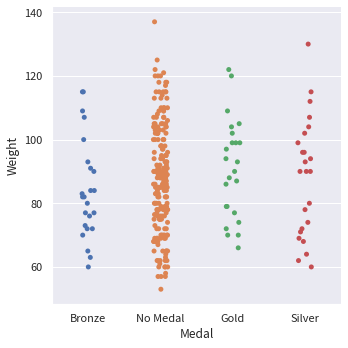

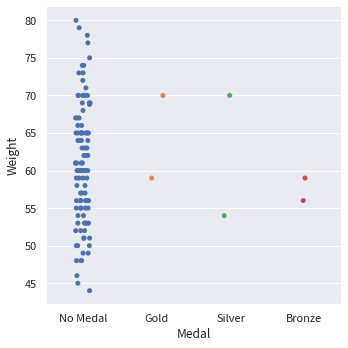

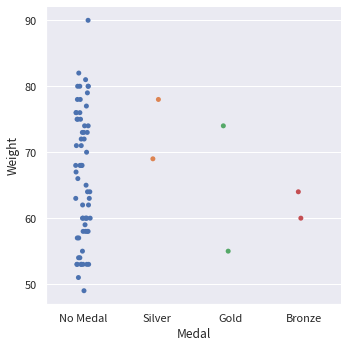

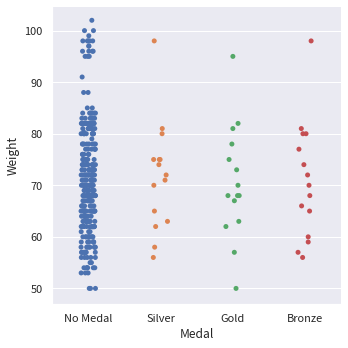

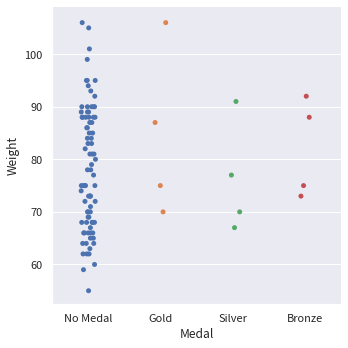

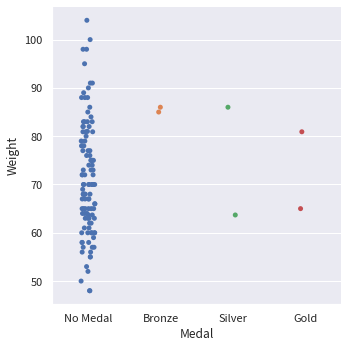

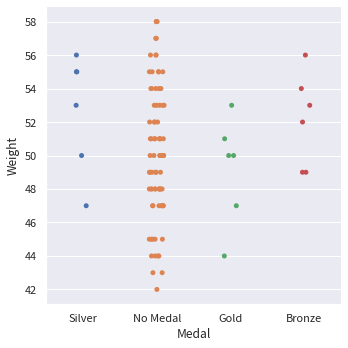

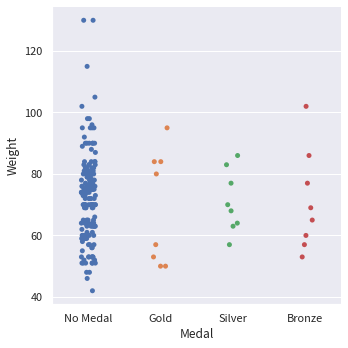

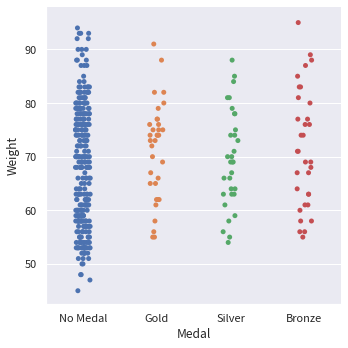

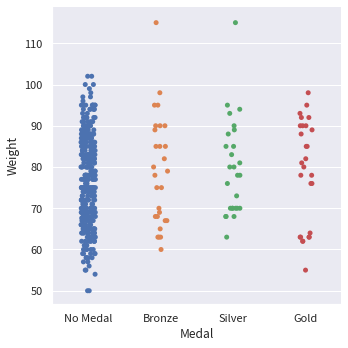

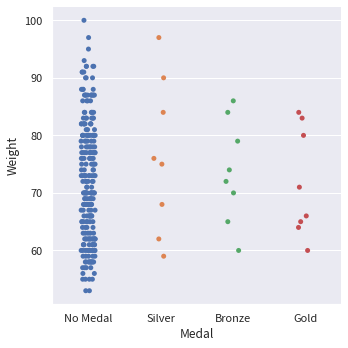

In [48]:
fig  = plt.figure(figsize=(20,6),dpi=200,facecolor='white',edgecolor='white',linewidth=2)
ax = []
sides = ['left','right','top']

for i in range(df_2016['Sport'].nunique()):
    ax.append(fig.add_subplot(12,3,i+1))


for i , sport in enumerate(list(df_2016['Sport'].unique())): 
    data = df_2016.query('Sport == @sport ')
    ax[i] = sns.catplot(x='Medal',y='Weight',data=data,kind='strip')
    #ax[i].set_xlim(1900,2017)
    #ax[i].set_ylim(0,25)
    #ax[i].set_title(sport)




# #fig.tight_layout()
# plt.show()

## 6-5 日本のオリンピックの歴史
### 6-5-1 日本っていつから参加してるんですか？

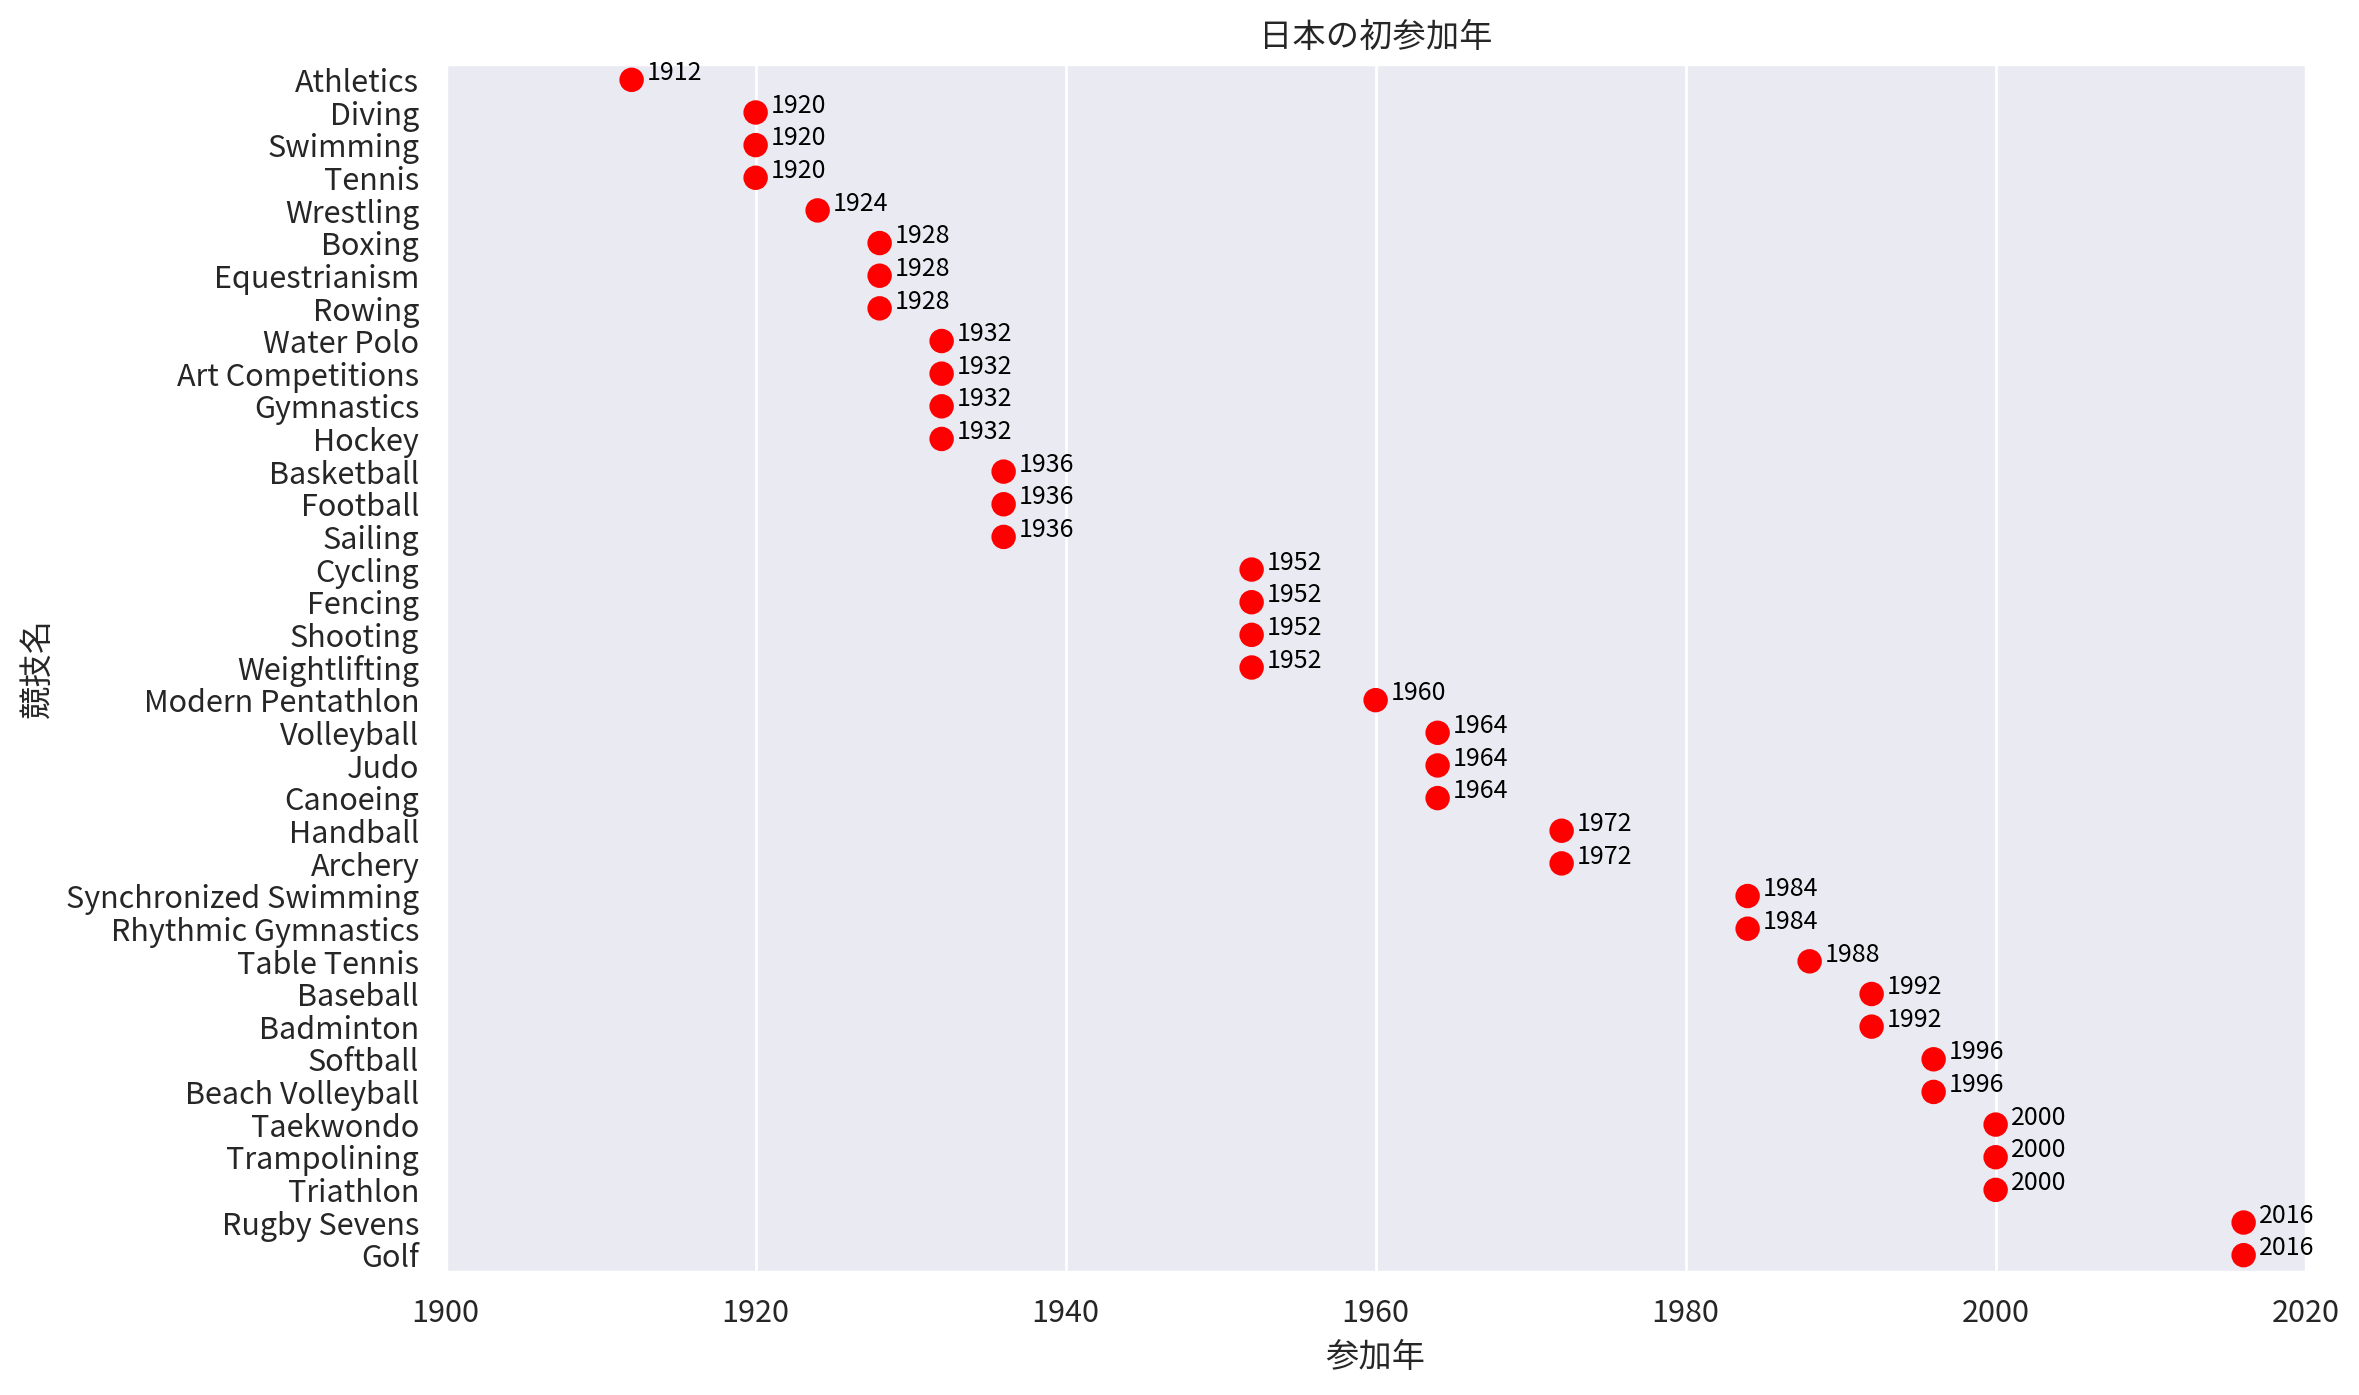

In [49]:
japan_sub_df = sub_df[sub_df['region']=='Japan']
japan_sub_df_year = japan_sub_df.groupby('Sport')['Year'].min().sort_values().reset_index()
fig = plt.figure(figsize=(12,8),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 
ax = fig.add_subplot(1,1,1)
sns.pointplot(x='Year',y='Sport',data=japan_sub_df_year,color='red',markers='o',fontsize=10,join=False,ax=ax)
ax.set_title('日本の初参加年')
ax.set_ylabel('競技名')
ax.set_xlabel('参加年')
ax.set_xlim(1900,2020)

for i, year in enumerate(japan_sub_df_year['Year']):
    ax.text(year+1,i,year,color='black',fontsize=9)

plt.show()

### INSIGHT

- 陸上競技が一番古く、1912年に初参加
- 前回の2016年で初参加はラグビーとゴルフ（ゴルフ自体が120年ぶり開催）
- 複数競技が同時に初参加になっているので、アジア予選を勝ち抜いたという理由と同時に競技自体が初開催ということも考えられますね

### 6-5-2 選手団って聞くけど、毎回何人くらいいるんですか？



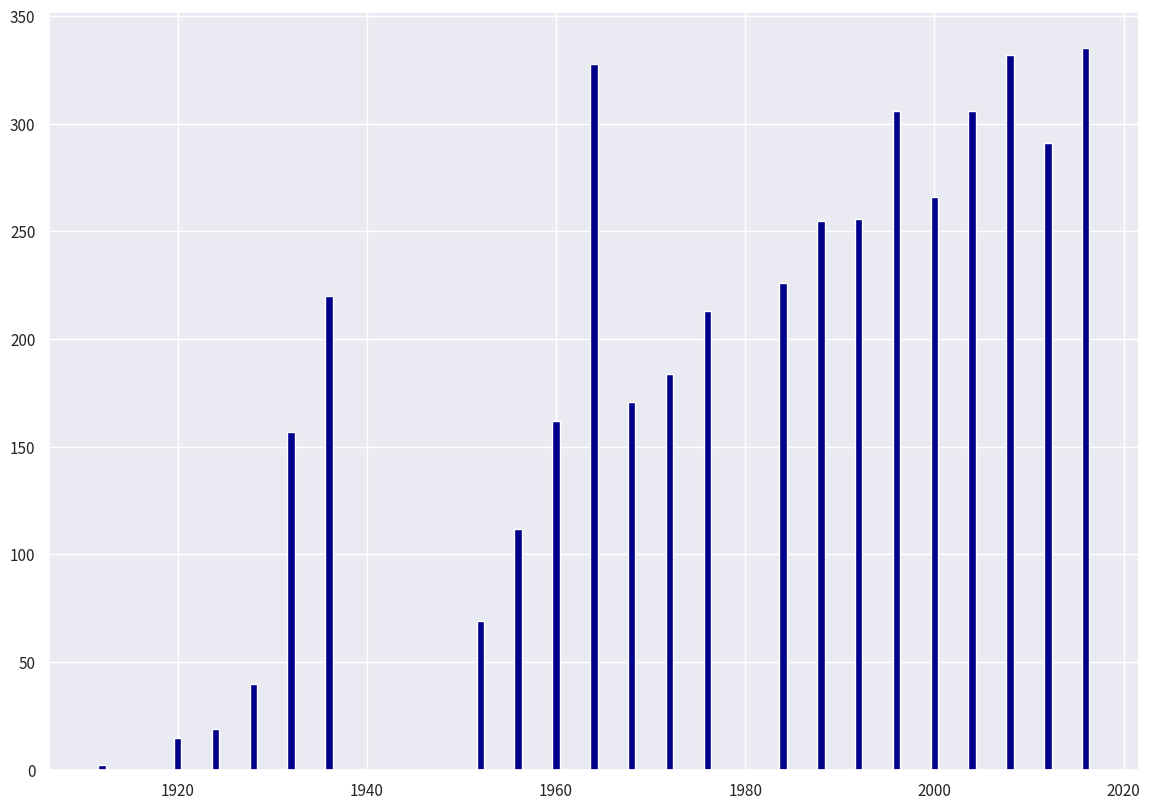

In [73]:
# 1. データの準備
japan_members = japan_sub_df.groupby('Year').nunique()

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

ax.bar(japan_members.index,japan_members['ID'],color='darkblue')

fig.tight_layout()
plt.show()


### INSIGHT
- 年々出場選手数は増えている
- 2016年夏季五輪では、335人が参加している

### 6-5-3 柔道が強い？毎回メダル取ってる種目ってなんですか？

日本が強い競技は柔道でしょうか？毎回メダルを獲得している競技を調べてみます。

In [94]:
japan_shutujou = japan_pivot_bool_T.replace(2,np.nan)

In [95]:
japan_got_medal = japan_pivot_bool_T.replace(1,np.nan)
japan_got_medal = japan_got_medal.replace(2,1)

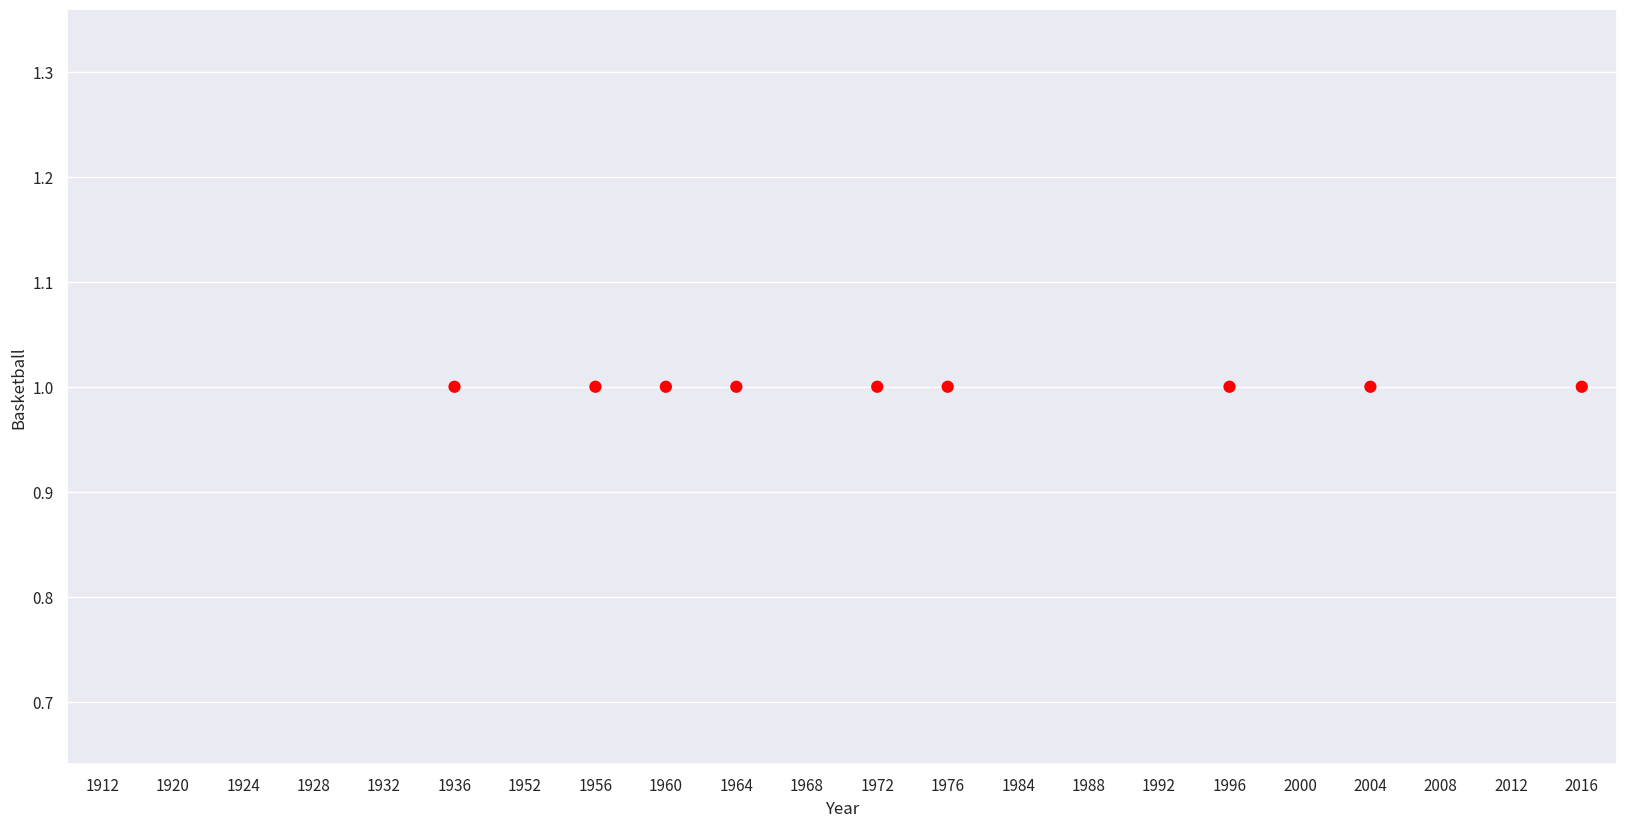

In [98]:
fig = plt.figure(figsize=(20,10),dpi=100,facecolor='white',edgecolor='white',linewidth=2)
ax = fig.add_subplot(1,1,1)
sns.pointplot(x=japan_got_medal.index,y=japan_got_medal['Basketball'],data=japan_got_medal,color='red',makers='o',fontsize=10,join=False,ax=ax)
sns.pointplot(x=japan_shutujou.index,y=japan_shutujou['Basketball'],data=japan_shutujou,color='red',makers='o',fontsize=10,join=False,ax=ax)



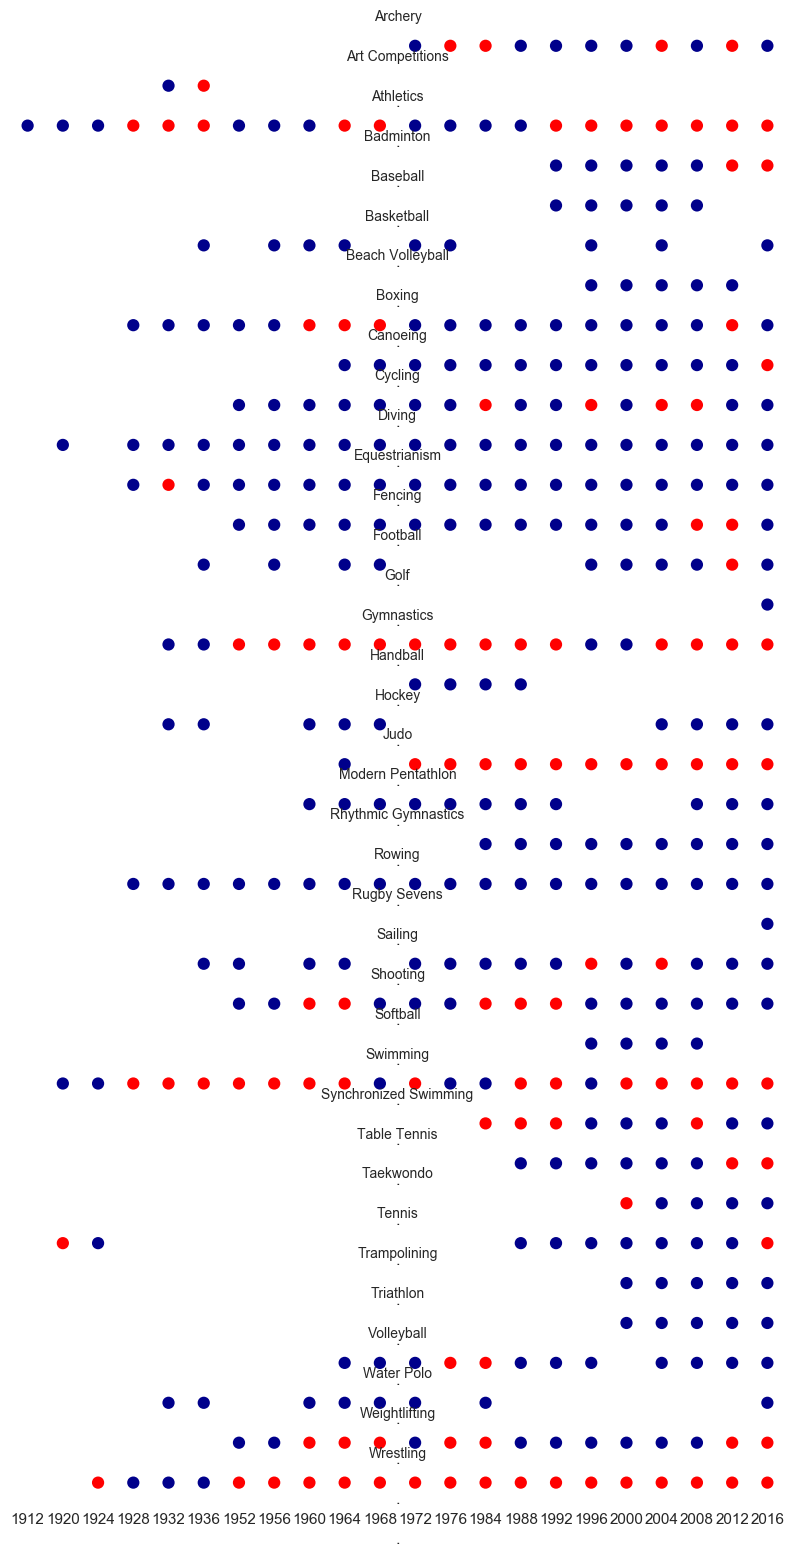

In [117]:
# データ準備
japan_pivot =  sub_df[sub_df['region']=='Japan'].copy()
japan_pivot['got_medal'] = japan_pivot['MedalSum'].map(lambda x: 1 if x >= 1 else 0)
japan_pivot_bool = pd.pivot_table(japan_pivot,index='Sport',columns='Year',\
               values='MedalSum',aggfunc=lambda x:len(x.dropna().unique()))
japan_pivot_bool_T = japan_pivot_bool.T
japan_shutujou = japan_pivot_bool_T.replace(2,np.nan)
japan_got_medal = japan_pivot_bool_T.replace(1,np.nan)
japan_got_medal = japan_got_medal.replace(2,1)

# Visualization
fig = plt.figure(figsize=(10,20),dpi=100,facecolor='white',edgecolor='white',linewidth=2)
ax = []

sns.set_style('whitegrid')
sides = ['left','right','top','bottom'] 


for i , sport in enumerate(japan_shutujou.columns):
    ax.append(fig.add_subplot(38,1,i+1))
    sns.pointplot(x=japan_got_medal.index,y=japan_got_medal[sport],\
              data=japan_got_medal,color='red',markers='o',fontsize=5,join=False,ax=ax[i])
    sns.pointplot(x=japan_shutujou.index,y=japan_shutujou[sport],\
              data=japan_shutujou,color='darkblue',markers='o',fontsize=5,join=False,ax=ax[i])
    #ax[i].set_xlim(1900,2017)
    #ax[i].set_ylim(0,2)
    ax[i].set_xlabel('.')
    ax[i].set_ylabel('')
    ax[i].set_title(sport,fontsize=10)
    ax[i].set_yticks([])
    [ax[i].spines[side].set_visible(False) for side in sides] 




    
plt.show()


### INSIGHT

- 陸上は取れる時期、取れない時期の波が何度かあるようです。直近7回大会（1992年以降）は何かしらの種目でメダルを獲得しているようです。
- 柔道は1972年からメダルは連続獲得しているようです（11大会連続？）
- レスリングは1952年からずっとメダル獲得しているようです



### 6-5-4 何度出てもメダルが取れない競技ってなんですか？



In [53]:
japan_sub_df2 = sub_df[sub_df['region']=='Japan']
japan_sanka = japan_sub_df2.groupby('Sport')['Year'].nunique().reset_index()
japan_medal_sum = japan_sub_df2.groupby('Sport')['MedalSum'].sum().reset_index()
japan_medal = japan_sub_df2[japan_sub_df2['MedalSum']>=1].groupby('Sport')['Year'].nunique().reset_index()
japan_sanka = pd.merge(japan_sanka,japan_medal_sum,on='Sport',how='left')
japan_sanka = pd.merge(japan_sanka,japan_medal,on='Sport',how='left')
japan_sanka.rename(columns=({'Sport':'競技','Year_x':'参加年数',\
                             'MedalSum':'獲得メダル総数','Year_y':'メダル獲得年数'}),inplace=True)
japan_sanka.fillna(0,inplace=True)
japan_sanka['メダル獲得年数'] = japan_sanka['メダル獲得年数'].astype(int)

japan_sanka['メダル未獲得年数'] = japan_sanka['参加年数'] - japan_sanka['メダル獲得年数']

In [54]:
japan_sanka[japan_sanka['メダル獲得年数']==0]

,競技,参加年数,獲得メダル総数,メダル獲得年数,メダル未獲得年数
5,Basketball,9,0,0,9
6,Beach Volleyball,5,0,0,5
10,Diving,20,0,0,20
14,Golf,1,0,0,1
16,Handball,4,0,0,4
19,Modern Pentathlon,11,0,0,11
20,Rhythmic Gymnastics,9,0,0,9
21,Rowing,19,0,0,19
22,Rugby Sevens,1,0,0,1
31,Trampolining,5,0,0,5


### INSIGHT

- 出場したものの、メダルが獲得できない競技は12競技です
- ダイビング(Divint）とボート（Rowing）は20回ほど出場しているもののメダル獲得にはなっていません